In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Earlier Flights

In [2]:
# Getting the data of Earlier flights
earlier_flights_df = pd.read_excel('Earlier_Flights_Data.xlsx')

earlier_flights_df.head()
earlier_flights_df.dtypes

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes)
0,UA,2023-01-01,2645,N23721,ORD,SYR,21:10:00,21:07:00,-3,23:57:00,23:47:00,-10
1,UA,2023-01-02,1998,N802UA,ORD,SYR,18:14:00,18:17:00,3,21:07:00,20:46:00,-21
2,UA,2023-01-03,1998,N854UA,ORD,SYR,18:14:00,18:13:00,-1,21:07:00,21:04:00,-3
3,UA,2023-01-04,1998,N893UA,ORD,SYR,18:24:00,18:41:00,17,21:17:00,21:31:00,14
4,UA,2020-01-05,2012,N825UA,ORD,SYR,19:00:00,19:21:00,21,21:47:00,21:55:00,8


Carrier Code                         object
Date (MM/DD/YYYY)            datetime64[ns]
Flight Number                         int64
Tail Number                          object
Origin Airport                       object
Destination Airport                  object
Scheduled departure time             object
Actual departure time                object
Departure delay (Minutes)             int64
Scheduled Arrival Time               object
Actual Arrival Time                  object
Arrival Delay (Minutes)               int64
dtype: object

### Data Pre-Processing

In [3]:
# Check for NaNs in the DataFrame
nan_df = earlier_flights_df[earlier_flights_df.isna().any(axis=1)]

# Count NaNs in each column
nan_counts = nan_df.isna().sum()

# Display the count of NaNs in each column
print("Count of NaNs in each column:")
print(nan_counts)

# Delete records containing NaNs
earlier_flights_df.dropna(inplace=True)

# Check for NaNs again after dropping
nan_counts_after = earlier_flights_df.isna().sum()

# Display the count of NaNs in each column after dropping
print("\nCount of NaNs in each column after dropping:")
print(nan_counts_after)

Count of NaNs in each column:
Carrier Code                  0
Date (MM/DD/YYYY)             0
Flight Number                 0
Tail Number                  53
Origin Airport                0
Destination Airport           0
Scheduled departure time      0
Actual departure time         0
Departure delay (Minutes)     0
Scheduled Arrival Time        0
Actual Arrival Time           0
Arrival Delay (Minutes)       0
dtype: int64

Count of NaNs in each column after dropping:
Carrier Code                 0
Date (MM/DD/YYYY)            0
Flight Number                0
Tail Number                  0
Origin Airport               0
Destination Airport          0
Scheduled departure time     0
Actual departure time        0
Departure delay (Minutes)    0
Scheduled Arrival Time       0
Actual Arrival Time          0
Arrival Delay (Minutes)      0
dtype: int64


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 0, 'Columns')

Text(0, 0.5, 'Count of NaNs')

Text(0.5, 1.0, 'Count of NaNs in each column')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Carrier Code'),
  Text(1, 0, 'Date (MM/DD/YYYY)'),
  Text(2, 0, 'Flight Number'),
  Text(3, 0, 'Tail Number'),
  Text(4, 0, 'Origin Airport'),
  Text(5, 0, 'Destination Airport'),
  Text(6, 0, 'Scheduled departure time'),
  Text(7, 0, 'Actual departure time'),
  Text(8, 0, 'Departure delay (Minutes)'),
  Text(9, 0, 'Scheduled Arrival Time'),
  Text(10, 0, 'Actual Arrival Time'),
  Text(11, 0, 'Arrival Delay (Minutes)')])

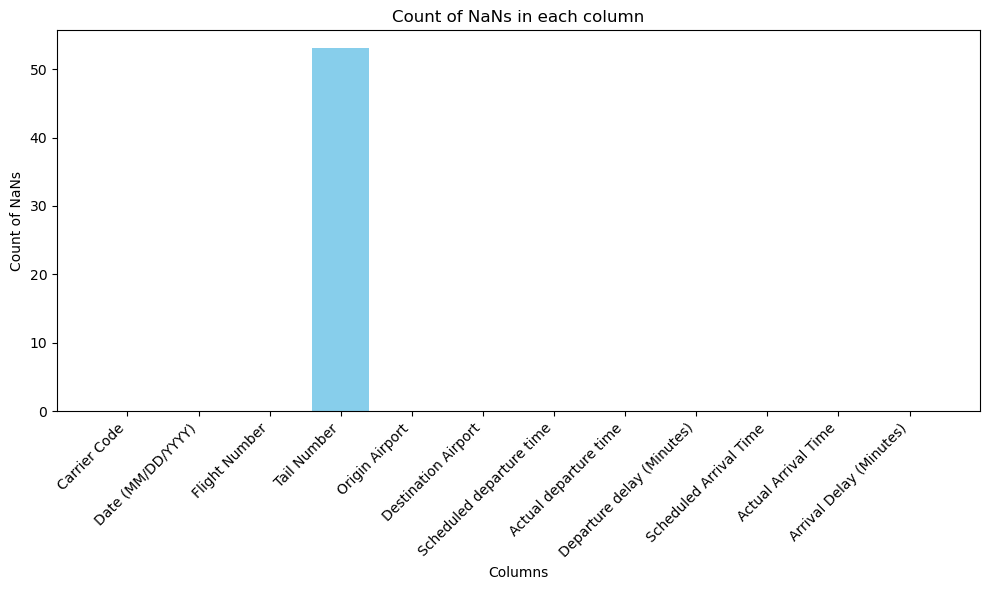

In [4]:
import matplotlib.pyplot as plt


# Define the columns and their corresponding NaN counts
columns = nan_counts.index
counts = nan_counts.values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(columns, counts, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Count of NaNs')
plt.title('Count of NaNs in each column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
# Convert time-related columns to datetime objects
time_columns = ['Scheduled departure time', 'Actual departure time', 'Scheduled Arrival Time', 'Actual Arrival Time']

for col in time_columns:
    earlier_flights_df[col] = earlier_flights_df[col].astype(str)
    earlier_flights_df[col] = pd.to_datetime(earlier_flights_df[col])
    
# Extract relevant features from time-related columns
earlier_flights_df['Departure Hour'] = earlier_flights_df['Scheduled departure time'].dt.hour.astype('category')
earlier_flights_df['Departure Minute'] = earlier_flights_df['Scheduled departure time'].dt.minute.astype('category')
earlier_flights_df['Arrival Hour'] = earlier_flights_df['Scheduled Arrival Time'].dt.hour.astype('category')
earlier_flights_df['Arrival Minute'] = earlier_flights_df['Scheduled Arrival Time'].dt.minute.astype('category')

# Drop original scheduled departure and arrival time columns
earlier_flights_df.drop(columns=time_columns, inplace=True)

# Display the processed DataFrame
earlier_flights_df.head()

/var/folders/14/psdcgz4x79q3ck4mmytbz1fw0000gn/T/ipykernel_17491/1071311672.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earlier_flights_df[col] = pd.to_datetime(earlier_flights_df[col])
/var/folders/14/psdcgz4x79q3ck4mmytbz1fw0000gn/T/ipykernel_17491/1071311672.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earlier_flights_df[col] = pd.to_datetime(earlier_flights_df[col])
/var/folders/14/psdcgz4x79q3ck4mmytbz1fw0000gn/T/ipykernel_17491/1071311672.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earlier_flights_df[col] = pd.to_datetime(earlier_flights_df[col]

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,UA,2023-01-01,2645,N23721,ORD,SYR,-3,-10,21,10,23,57
1,UA,2023-01-02,1998,N802UA,ORD,SYR,3,-21,18,14,21,7
2,UA,2023-01-03,1998,N854UA,ORD,SYR,-1,-3,18,14,21,7
3,UA,2023-01-04,1998,N893UA,ORD,SYR,17,14,18,24,21,17
4,UA,2020-01-05,2012,N825UA,ORD,SYR,21,8,19,0,21,47


In [6]:
# Extract day of the week and create a new column
earlier_flights_df['Day of Week'] = pd.to_datetime(earlier_flights_df['Date (MM/DD/YYYY)']).dt.day_name()

earlier_flights_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week
0,UA,2023-01-01,2645,N23721,ORD,SYR,-3,-10,21,10,23,57,Sunday
1,UA,2023-01-02,1998,N802UA,ORD,SYR,3,-21,18,14,21,7,Monday
2,UA,2023-01-03,1998,N854UA,ORD,SYR,-1,-3,18,14,21,7,Tuesday
3,UA,2023-01-04,1998,N893UA,ORD,SYR,17,14,18,24,21,17,Wednesday
4,UA,2020-01-05,2012,N825UA,ORD,SYR,21,8,19,0,21,47,Sunday


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Day of Week', ylabel='Arrival Delay (Minutes)'>

Text(0.5, 1.0, 'Arrival Delay vs Days of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Arrival Delay (minutes)')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

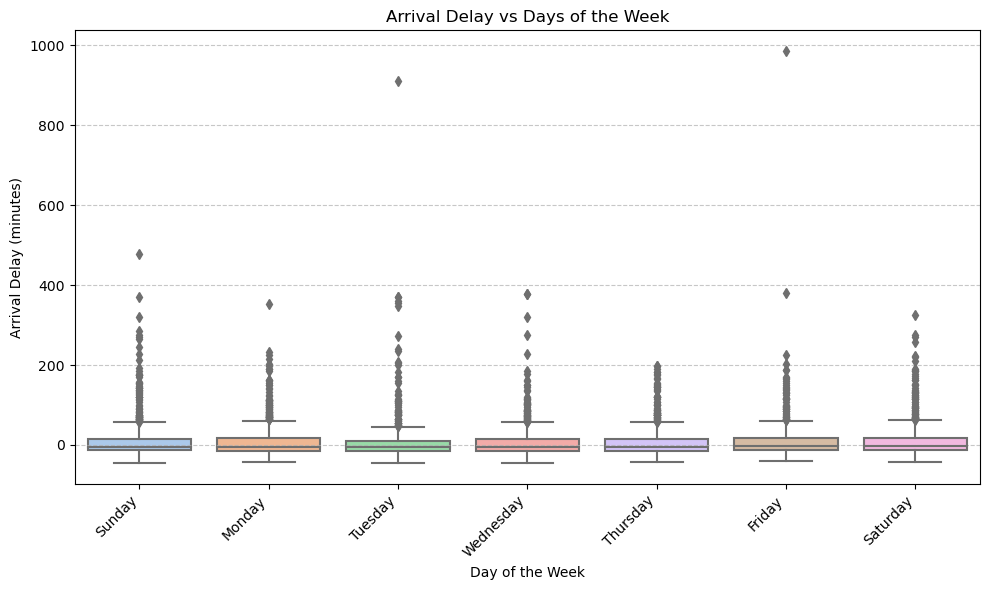

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Arrival Delay (Minutes)', data=earlier_flights_df, palette='pastel')
plt.title('Arrival Delay vs Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# Define a function to map Arrival Delay to Arrival Status
def map_arrival_status(arrival_delay):
    if arrival_delay < -5:
        return 'early'
    elif -5 <= arrival_delay <= 5:
        return 'on-time'
    else:
        return 'late'

In [9]:
# Apply the function to create the Arrival Status column
earlier_flights_df['Arrival Status'] = earlier_flights_df['Arrival Delay (Minutes)'].apply(map_arrival_status)

earlier_flights_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status
0,UA,2023-01-01,2645,N23721,ORD,SYR,-3,-10,21,10,23,57,Sunday,early
1,UA,2023-01-02,1998,N802UA,ORD,SYR,3,-21,18,14,21,7,Monday,early
2,UA,2023-01-03,1998,N854UA,ORD,SYR,-1,-3,18,14,21,7,Tuesday,on-time
3,UA,2023-01-04,1998,N893UA,ORD,SYR,17,14,18,24,21,17,Wednesday,late
4,UA,2020-01-05,2012,N825UA,ORD,SYR,21,8,19,0,21,47,Sunday,late


### Mapping Weather Data

In [10]:
# Getting Weather Data
weather_df = pd.read_csv('Weather_Data.csv')

weather_df.head()

,datetime,timestamp_local,temp,app_temp,clouds,precip,rh,wind_spd,wind_gust_spd,wind_dir,weather_description,pres,slp,vis,snow,Location
0,2019-01-01:05,2019-01-01T00:00:00,9.7,9.7,100,2.5,100,5.15,11.6,160,Light rain,1008,1009,3,0.0,JFK
1,2019-01-01:06,2019-01-01T01:00:00,9.4,9.4,100,2.0,100,5.09,10.4,180,Light rain,1007,1007,0,0.0,JFK
2,2019-01-01:07,2019-01-01T02:00:00,8.9,8.9,100,1.0,100,3.22,11.6,180,Light rain,1004,1005,0,0.0,JFK
3,2019-01-01:08,2019-01-01T03:00:00,8.9,8.9,100,0.0,100,4.34,13.6,205,Fog,1002,1003,1,0.0,JFK
4,2019-01-01:09,2019-01-01T04:00:00,9.4,9.4,100,0.0,100,1.50,13.6,280,Fog,1002,1003,2,0.0,JFK


In [11]:
earlier_flights_df.dtypes
weather_df.dtypes

Carrier Code                         object
Date (MM/DD/YYYY)            datetime64[ns]
Flight Number                         int64
Tail Number                          object
Origin Airport                       object
Destination Airport                  object
Departure delay (Minutes)             int64
Arrival Delay (Minutes)               int64
Departure Hour                     category
Departure Minute                   category
Arrival Hour                       category
Arrival Minute                     category
Day of Week                          object
Arrival Status                       object
dtype: object

datetime                object
timestamp_local         object
temp                   float64
app_temp               float64
clouds                   int64
precip                 float64
rh                       int64
wind_spd               float64
wind_gust_spd          float64
wind_dir                 int64
weather_description     object
pres                     int64
slp                      int64
vis                      int64
snow                   float64
Location                object
dtype: object

In [12]:
# Convert date in flights dataframe to datetime
earlier_flights_df["Date (MM/DD/YYYY)"] = pd.to_datetime(earlier_flights_df["Date (MM/DD/YYYY)"]).dt.date

# Extract date and hour from timestamp_local in weather dataframe
weather_df["Date"] = pd.to_datetime(weather_df["timestamp_local"]).dt.date
weather_df["Hour"] = pd.to_datetime(weather_df["timestamp_local"]).dt.hour

earlier_flights_df.dtypes
weather_df.dtypes

Carrier Code                   object
Date (MM/DD/YYYY)              object
Flight Number                   int64
Tail Number                    object
Origin Airport                 object
Destination Airport            object
Departure delay (Minutes)       int64
Arrival Delay (Minutes)         int64
Departure Hour               category
Departure Minute             category
Arrival Hour                 category
Arrival Minute               category
Day of Week                    object
Arrival Status                 object
dtype: object

datetime                object
timestamp_local         object
temp                   float64
app_temp               float64
clouds                   int64
precip                 float64
rh                       int64
wind_spd               float64
wind_gust_spd          float64
wind_dir                 int64
weather_description     object
pres                     int64
slp                      int64
vis                      int64
snow                   float64
Location                object
Date                    object
Hour                     int32
dtype: object

In [13]:
weather_df.head()

,datetime,timestamp_local,temp,app_temp,clouds,precip,rh,wind_spd,wind_gust_spd,wind_dir,weather_description,pres,slp,vis,snow,Location,Date,Hour
0,2019-01-01:05,2019-01-01T00:00:00,9.7,9.7,100,2.5,100,5.15,11.6,160,Light rain,1008,1009,3,0.0,JFK,2019-01-01,0
1,2019-01-01:06,2019-01-01T01:00:00,9.4,9.4,100,2.0,100,5.09,10.4,180,Light rain,1007,1007,0,0.0,JFK,2019-01-01,1
2,2019-01-01:07,2019-01-01T02:00:00,8.9,8.9,100,1.0,100,3.22,11.6,180,Light rain,1004,1005,0,0.0,JFK,2019-01-01,2
3,2019-01-01:08,2019-01-01T03:00:00,8.9,8.9,100,0.0,100,4.34,13.6,205,Fog,1002,1003,1,0.0,JFK,2019-01-01,3
4,2019-01-01:09,2019-01-01T04:00:00,9.4,9.4,100,0.0,100,1.50,13.6,280,Fog,1002,1003,2,0.0,JFK,2019-01-01,4


Correlation Matrix for Weather Data:
                   temp  app_temp    clouds    precip        rh  wind_spd  \
temp           1.000000  0.994229 -0.115374  0.049561 -0.056325 -0.111940   
app_temp       0.994229  1.000000 -0.113150  0.053275 -0.026281 -0.152037   
clouds        -0.115374 -0.113150  1.000000  0.149982  0.233471  0.121340   
precip         0.049561  0.053275  0.149982  1.000000  0.162454  0.074320   
rh            -0.056325 -0.026281  0.233471  0.162454  1.000000 -0.268923   
wind_spd      -0.111940 -0.152037  0.121340  0.074320 -0.268923  1.000000   
wind_gust_spd -0.135722 -0.168200  0.180172  0.129190 -0.235269  0.820623   
wind_dir      -0.167106 -0.177036 -0.085979 -0.061469 -0.144976  0.135439   
pres           0.096615  0.104297 -0.199507 -0.069939 -0.021918 -0.082025   
slp           -0.234231 -0.226299 -0.228396 -0.147774 -0.182026 -0.212129   
vis            0.193052  0.191147 -0.270657 -0.225873 -0.359934 -0.035255   
snow          -0.126930 -0.133972  0.07

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix for Weather Data')

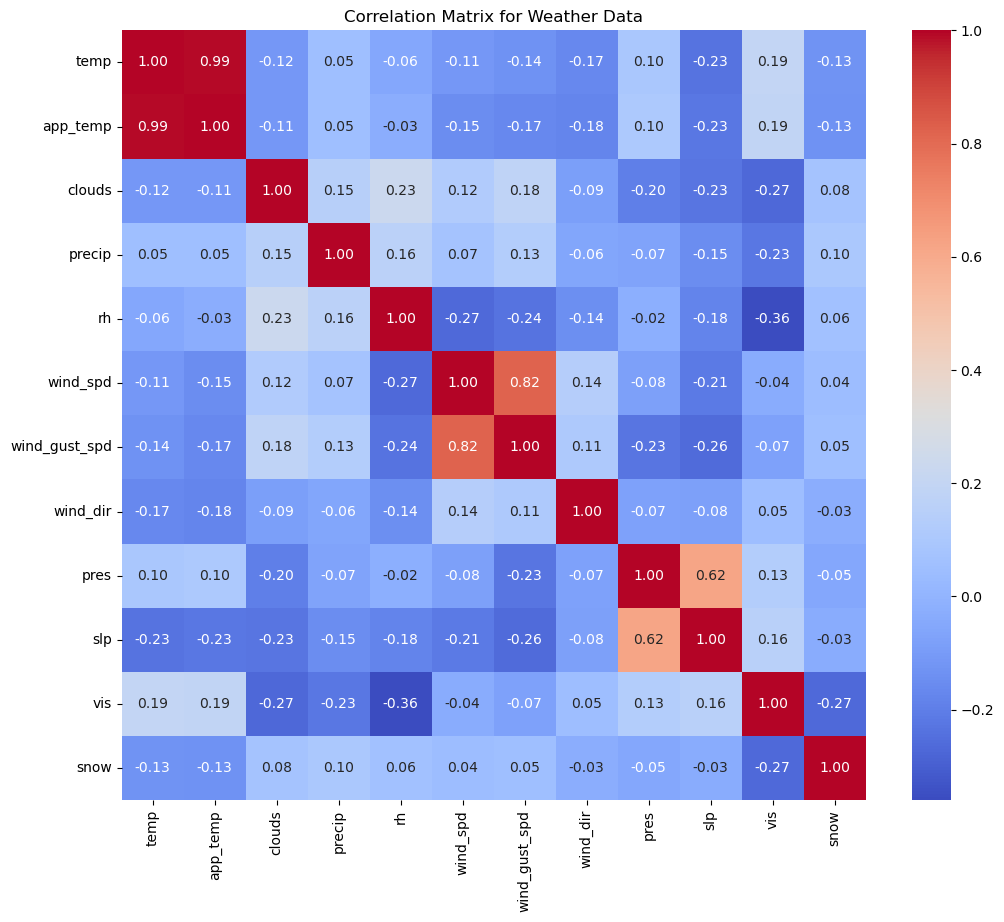

In [14]:
# Select only numerical columns
numerical_weather_df = weather_df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
weather_correlation_matrix = numerical_weather_df.corr()

# Display correlation matrix
print("Correlation Matrix for Weather Data:")
print(weather_correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(weather_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix for Weather Data')

# Show plot
plt.show()

In [15]:
# Merge flights data with the origin weather data based on date, arrival hour and Origin airport
earlier_flights_weather_df = pd.merge(earlier_flights_df, weather_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Departure Hour", "Origin Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

# Add '_org' suffix to weather columns
weather_columns = list(weather_df.columns)
earlier_flights_weather_df.rename(columns={col: col + "_org" for col in weather_columns}, inplace=True)

In [16]:
earlier_flights_weather_df.head()
earlier_flights_weather_df.dtypes

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,...,wind_gust_spd_org,wind_dir_org,weather_description_org,pres_org,slp_org,vis_org,snow_org,Location_org,Date_org,Hour_org
0,UA,2023-01-01,2645,N23721,ORD,SYR,-3,-10,21,10,...,3.6,250,Overcast clouds,992,1017,6,0.0,ORD,2023-01-01,21
1,UA,2023-01-02,1998,N802UA,ORD,SYR,3,-21,18,14,...,6.4,80,Overcast clouds,991,1015,11,0.0,ORD,2023-01-02,18
2,UA,2023-01-03,1998,N854UA,ORD,SYR,-1,-3,18,14,...,2.8,20,Haze,977,1001,0,0.0,ORD,2023-01-03,18
3,UA,2023-01-04,1998,N893UA,ORD,SYR,17,14,18,24,...,8.4,220,Overcast clouds,984,1009,6,0.0,ORD,2023-01-04,18
4,UA,2020-01-05,2012,N825UA,ORD,SYR,21,8,19,0,...,11.6,280,Scattered clouds,988,1014,16,0.0,ORD,2020-01-05,19


Carrier Code                   object
Date (MM/DD/YYYY)              object
Flight Number                   int64
Tail Number                    object
Origin Airport                 object
Destination Airport            object
Departure delay (Minutes)       int64
Arrival Delay (Minutes)         int64
Departure Hour                  int32
Departure Minute             category
Arrival Hour                 category
Arrival Minute               category
Day of Week                    object
Arrival Status                 object
datetime_org                   object
timestamp_local_org            object
temp_org                      float64
app_temp_org                  float64
clouds_org                      int64
precip_org                    float64
rh_org                          int64
wind_spd_org                  float64
wind_gust_spd_org             float64
wind_dir_org                    int64
weather_description_org        object
pres_org                        int64
slp_org     

In [17]:
# Merge flights data with the destination weather data based on date, arrival hour and destination airport
earlier_flights_weather_df = pd.merge(earlier_flights_weather_df, weather_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Arrival Hour", "Destination Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

# Add '_dest' suffix to weather columns
earlier_flights_weather_df.rename(columns={col: col + "_dest" for col in weather_columns}, inplace=True)

In [18]:
earlier_flights_weather_df.head()
earlier_flights_weather_df.dtypes

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,...,wind_gust_spd_dest,wind_dir_dest,weather_description_dest,pres_dest,slp_dest,vis_dest,snow_dest,Location_dest,Date_dest,Hour_dest
0,UA,2023-01-01,2645,N23721,ORD,SYR,-3,-10,21,10,...,3.6,280,Overcast clouds,1000,1015,11,0.0,SYR,2023-01-01,23
1,UA,2023-01-02,1998,N802UA,ORD,SYR,3,-21,18,14,...,2.4,55,Overcast clouds,1006,1021,16,0.0,SYR,2023-01-02,21
2,UA,2023-01-03,1998,N854UA,ORD,SYR,-1,-3,18,14,...,4.8,70,Overcast clouds,991,1006,10,0.0,SYR,2023-01-03,21
3,UA,2023-01-04,1998,N893UA,ORD,SYR,17,14,18,24,...,13.2,80,Overcast clouds,990,1005,10,0.0,SYR,2023-01-04,21
4,UA,2020-01-05,2012,N825UA,ORD,SYR,21,8,19,0,...,3.2,210,Overcast clouds,998,1013,16,0.0,SYR,2020-01-05,21


Carrier Code                   object
Date (MM/DD/YYYY)              object
Flight Number                   int64
Tail Number                    object
Origin Airport                 object
Destination Airport            object
Departure delay (Minutes)       int64
Arrival Delay (Minutes)         int64
Departure Hour                  int32
Departure Minute             category
Arrival Hour                    int32
Arrival Minute               category
Day of Week                    object
Arrival Status                 object
datetime_org                   object
timestamp_local_org            object
temp_org                      float64
app_temp_org                  float64
clouds_org                      int64
precip_org                    float64
rh_org                          int64
wind_spd_org                  float64
wind_gust_spd_org             float64
wind_dir_org                    int64
weather_description_org        object
pres_org                        int64
slp_org     

In [19]:
earlier_flights_weather_df.isna().sum()

Carrier Code                 0
Date (MM/DD/YYYY)            0
Flight Number                0
Tail Number                  0
Origin Airport               0
Destination Airport          0
Departure delay (Minutes)    0
Arrival Delay (Minutes)      0
Departure Hour               0
Departure Minute             0
Arrival Hour                 0
Arrival Minute               0
Day of Week                  0
Arrival Status               0
datetime_org                 0
timestamp_local_org          0
temp_org                     0
app_temp_org                 0
clouds_org                   0
precip_org                   0
rh_org                       0
wind_spd_org                 0
wind_gust_spd_org            0
wind_dir_org                 0
weather_description_org      0
pres_org                     0
slp_org                      0
vis_org                      0
snow_org                     0
Location_org                 0
Date_org                     0
Hour_org                     0
datetime

In [20]:
# Drop irrelevant columns
earlier_flights_weather_df.drop(columns=['Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number', 'Destination Airport', 
                                         'Departure delay (Minutes)', 'Arrival Delay (Minutes)', 
                                         'datetime_org', 'timestamp_local_org', 'Date_org', 
                                         'Hour_org', 'Location_org', 
                                         'datetime_dest', 'timestamp_local_dest', 'Date_dest', 
                                         'Hour_dest', 'Location_dest'], inplace=True)

In [21]:
earlier_flights_weather_df.dtypes

Carrier Code                  object
Origin Airport                object
Departure Hour                 int32
Departure Minute            category
Arrival Hour                   int32
Arrival Minute              category
Day of Week                   object
Arrival Status                object
temp_org                     float64
app_temp_org                 float64
clouds_org                     int64
precip_org                   float64
rh_org                         int64
wind_spd_org                 float64
wind_gust_spd_org            float64
wind_dir_org                   int64
weather_description_org       object
pres_org                       int64
slp_org                        int64
vis_org                        int64
snow_org                     float64
temp_dest                    float64
app_temp_dest                float64
clouds_dest                    int64
precip_dest                  float64
rh_dest                        int64
wind_spd_dest                float64
w

Correlation Matrix:
                    Departure Hour  Arrival Hour  temp_org  app_temp_org  \
Departure Hour            1.000000      0.604844  0.082585      0.076427   
Arrival Hour              0.604844      1.000000  0.050391      0.042091   
temp_org                  0.082585      0.050391  1.000000      0.992471   
app_temp_org              0.076427      0.042091  0.992471      1.000000   
clouds_org               -0.000271      0.024492 -0.046839     -0.028407   
precip_org                0.021375      0.021700  0.025385      0.031641   
rh_org                   -0.095692     -0.131343 -0.034624     -0.000348   
wind_spd_org              0.015602      0.020173 -0.151128     -0.190570   
wind_gust_spd_org        -0.050604      0.011644 -0.108343     -0.139517   
wind_dir_org             -0.026824     -0.029692 -0.164077     -0.181193   
pres_org                 -0.232500     -0.325633 -0.231823     -0.216226   
slp_org                  -0.083575     -0.078298 -0.293765     -0.28

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

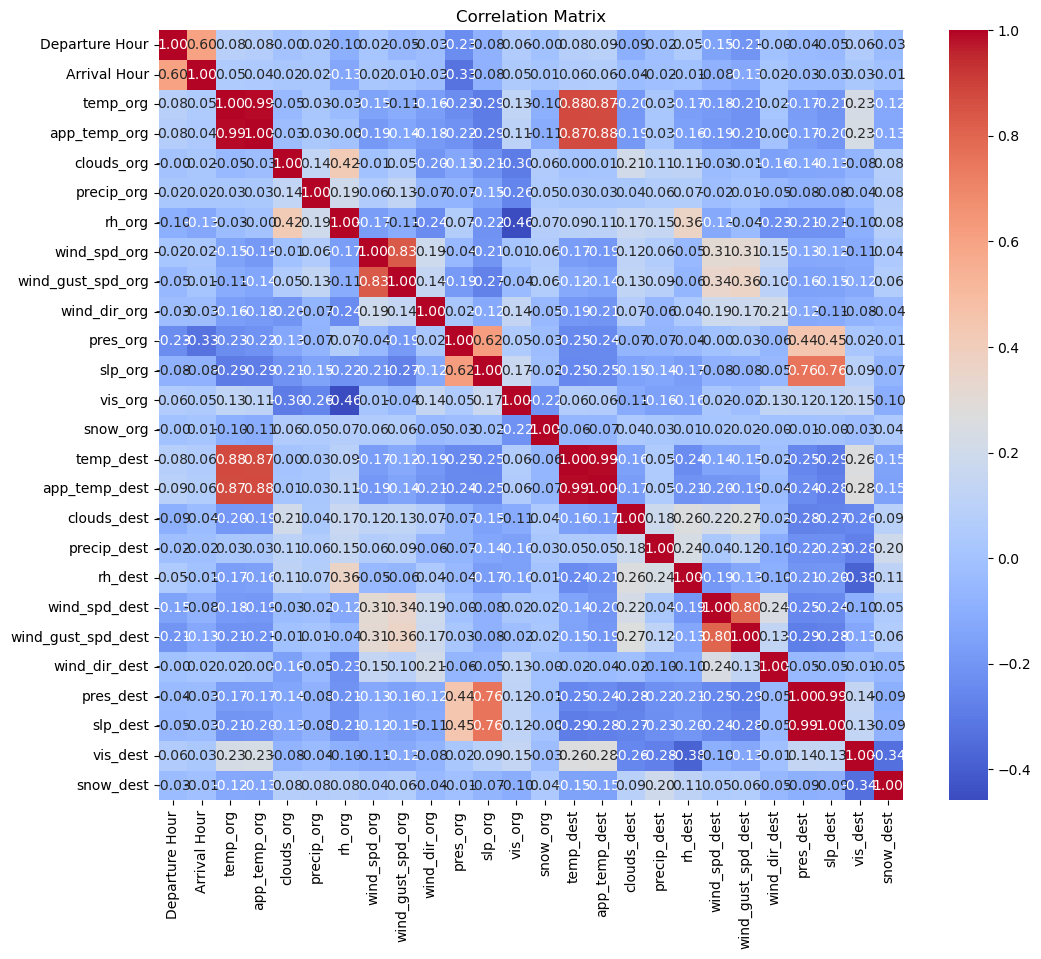

In [22]:
# Select only numerical columns
numerical_df = earlier_flights_weather_df.select_dtypes(include=['int64', 'float64', 'int32'])

# Create correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

In [23]:
# Define all possible hour categories (0 to 23)
hour_categories = [str(i) for i in range(24)]

# Define all possible minute categories (0 to 59)
minute_categories = [str(i) for i in range(60)]

# Getting Unique values of weather_description
# weather_description_unique_values = weather_df['weather_description'].unique()
# print(weather_description_unique_values)

# Define all possible weather_description categories
weather_categories = ['Light rain', 'Fog', 'Overcast clouds', 'Broken clouds', 'Scattered clouds',
                      'Moderate rain', 'Few clouds', 'Clear Sky', 'Light snow', 'Mix snow/rain',
                      'Sleet', 'Heavy rain', 'Flurries', 'Snow', 'Heavy snow', 'Freezing rain',
                      'Heavy sleet', 'Haze', 'Thunderstorm with heavy rain', 'Drizzle']

# Define Carrier Code Categories
carrier_code_categories = ['UA', 'B6', 'WN', '9E', 'MQ']

# Define Origin Airport Categories
org_airport_categories = ['ORD', 'JFK', 'MCO']

# Define Day of Week Categories
day_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [24]:
# Convert time to hours and minutes and specify the categories
earlier_flights_weather_df['Departure Hour'] = pd.Categorical(earlier_flights_weather_df['Departure Hour'], categories=hour_categories)
earlier_flights_weather_df['Departure Minute'] = pd.Categorical(earlier_flights_weather_df['Departure Minute'], categories=minute_categories)
earlier_flights_weather_df['Arrival Hour'] = pd.Categorical(earlier_flights_weather_df['Arrival Hour'], categories=hour_categories)
earlier_flights_weather_df['Arrival Minute'] = pd.Categorical(earlier_flights_weather_df['Arrival Minute'], categories=minute_categories)

# Convert weather description to weather categories type
earlier_flights_weather_df['weather_description_org'] = pd.Categorical(earlier_flights_weather_df['weather_description_org'], categories=weather_categories)
earlier_flights_weather_df['weather_description_dest'] = pd.Categorical(earlier_flights_weather_df['weather_description_dest'], categories=weather_categories)

# Convert 'Carrier Code' to categorical type
earlier_flights_weather_df['Carrier Code'] = pd.Categorical(earlier_flights_weather_df['Carrier Code'], categories=carrier_code_categories)

# Convert 'Origin Airport' to categorical type
earlier_flights_weather_df['Origin Airport'] = pd.Categorical(earlier_flights_weather_df['Origin Airport'], categories=org_airport_categories)

# Convert 'Day of Week' to categorical type
earlier_flights_weather_df['Day of Week'] = pd.Categorical(earlier_flights_weather_df['Day of Week'], categories=day_categories)

# Convert 'Arrival Status' to categorical type
earlier_flights_weather_df['Arrival Status'] = earlier_flights_weather_df['Arrival Status'].astype('category')

earlier_flights_weather_df.dtypes

Carrier Code                category
Origin Airport              category
Departure Hour              category
Departure Minute            category
Arrival Hour                category
Arrival Minute              category
Day of Week                 category
Arrival Status              category
temp_org                     float64
app_temp_org                 float64
clouds_org                     int64
precip_org                   float64
rh_org                         int64
wind_spd_org                 float64
wind_gust_spd_org            float64
wind_dir_org                   int64
weather_description_org     category
pres_org                       int64
slp_org                        int64
vis_org                        int64
snow_org                     float64
temp_dest                    float64
app_temp_dest                float64
clouds_dest                    int64
precip_dest                  float64
rh_dest                        int64
wind_spd_dest                float64
w

In [25]:
# Apply one-hot encoding to categorical columns
earlier_flights_weather_df_encoded = pd.get_dummies(earlier_flights_weather_df, 
                                                    columns=['Carrier Code', 'Origin Airport', 
                                                             'Departure Hour', 'Departure Minute', 
                                                             'Arrival Hour', 'Arrival Minute', 
                                                             'Day of Week', 'weather_description_org', 
                                                             'weather_description_dest'], drop_first=True)

earlier_flights_weather_df_encoded.head()

,Arrival Status,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
0,early,4.4,3.1,100,0.0,87,1.60,3.6,250,992,...,False,False,False,False,False,False,False,False,False,False
1,early,4.4,0.8,100,0.0,85,4.59,6.4,80,991,...,False,False,False,False,False,False,False,False,False,False
2,on-time,6.7,5.3,100,0.0,88,2.10,2.8,20,977,...,False,False,False,False,False,False,False,False,False,False
3,late,0.6,-3.3,100,0.0,88,3.60,8.4,220,984,...,False,False,False,False,False,False,False,False,False,False
4,late,2.6,-2.6,25,0.0,69,7.32,11.6,280,988,...,False,False,False,False,False,False,False,False,False,False


### Model Training and Evaluation

In [26]:
# Define features and target
X_earlier = earlier_flights_weather_df_encoded.drop(columns=['Arrival Status'])
y_earlier = earlier_flights_weather_df_encoded['Arrival Status']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_earlier, y_earlier, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train_1.shape, y_train_1.shape)
print("Testing set shape:", X_test_1.shape, y_test_1.shape)

Training set shape: (3590, 238) (3590,)
Testing set shape: (898, 238) (898,)


#### Random Forest Classifier

In [27]:
# Initialize the Random Forest Classifier
rf_classifier_earlier = RandomForestClassifier(random_state=50, max_features='sqrt', n_estimators=200, min_samples_leaf=2)

# Train the model
rf_classifier_earlier.fit(X_train_1, y_train_1)

# Predictions on the training set
train_predictions = rf_classifier_earlier.predict(X_train_1)
train_accuracy = accuracy_score(y_train_1, train_predictions)

# Predictions on the testing set
test_predictions = rf_classifier_earlier.predict(X_test_1)
test_accuracy = accuracy_score(y_test_1, test_predictions)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=50)

Training accuracy: 0.9704735376044569
Testing accuracy: 0.49888641425389757


#### Gradient Boosting Classifier

In [28]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded_1 = label_encoder.fit_transform(y_train_1)

# Initialize the Gradient Boosting Classifier
gb_classifier_earlier = GradientBoostingClassifier()

# Train the model
gb_classifier_earlier.fit(X_train_1, y_train_encoded_1)

# Predictions on the training set
train_predictions = gb_classifier_earlier.predict(X_train_1)

# Predictions on the testing set
test_predictions = gb_classifier_earlier.predict(X_test_1)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_encoded_1, train_predictions.round())

# Encode the target variable for the testing set
y_test_encoded_1 = label_encoder.transform(y_test_1)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test_encoded_1, test_predictions.round())

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

GradientBoostingClassifier()

Training accuracy: 0.6256267409470752
Testing accuracy: 0.48997772828507796


#### Logistic Regression

In [29]:
# Scaling the data
sc = StandardScaler()
X_train_scaled_1 = pd.DataFrame(sc.fit_transform(X_train_1), columns = X_train_1.columns, index = X_train_1.index)
X_test_scaled_1 = pd.DataFrame(sc.transform(X_test_1), columns = X_test_1.columns, index = X_test_1.index)

X_train_scaled_1
X_test_scaled_1
y_train_1
y_test_1

,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,slp_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
4208,-1.038041,-1.140517,-0.834913,-0.160144,-0.239921,0.524632,0.021035,1.499470,1.401224,1.509086,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
100,-1.149215,-1.140517,-2.214313,-0.160144,0.475289,-0.569125,-0.096758,0.591186,-0.800417,0.465982,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
12,-2.048710,-2.149191,-0.610360,-0.160144,-0.342094,0.057682,-0.096758,-0.922621,-0.161231,1.900250,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
2256,-0.300253,-0.148516,0.865277,0.046810,-1.465995,0.124990,-0.450137,1.499470,0.548976,-0.055569,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
1504,-1.199748,-1.315576,0.063300,-0.160144,0.322029,0.524632,0.698346,0.288425,-1.865727,-1.489836,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.721085,1.860496,-0.610360,-0.160144,-0.137748,-0.989800,-1.156895,-0.518939,0.548976,0.205207,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
466,1.498737,1.268629,-0.610360,-0.160144,-1.568168,-0.623813,-0.921309,-1.225383,-1.510623,-0.837897,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
3092,0.862016,0.860158,0.833198,1.081576,1.343758,0.230159,-0.450137,-0.771241,0.122852,-0.968285,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
3772,-1.038041,-0.965458,-0.610360,-0.160144,0.628548,-0.989800,-0.567930,1.600391,1.401224,1.509086,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0


,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,slp_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
157,-0.694414,-0.782063,0.576565,-0.160144,-0.188835,0.524632,0.492208,0.187504,-1.439603,-0.707509,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
4246,-1.482736,-1.398938,-1.219862,-0.160144,0.424202,-0.989800,-1.039102,1.701311,1.046121,0.857146,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
1020,0.942870,0.893503,0.672802,-0.160144,0.475289,1.450118,1.994070,0.187504,-1.510623,-0.837897,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
1119,1.185430,1.085234,0.287854,-0.160144,-0.444267,0.091336,-0.694558,-0.872161,-1.084499,-0.055569,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
731,1.721085,1.577067,0.576565,-0.160144,-1.006217,-0.152656,0.462759,0.187504,-1.439603,-0.837897,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,0.427428,0.451687,-0.610360,-0.160144,-1.670341,0.945307,1.257863,1.196709,0.691017,0.596370,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
3994,-0.381107,-0.215205,0.576565,-0.160144,-0.648612,0.785450,0.492208,0.944408,-0.161231,-1.359448,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
4212,-1.300815,-1.273896,0.576565,-0.160144,-0.035575,-0.674294,-0.450137,0.692107,0.904079,0.465982,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0
2025,-0.583240,-0.381928,0.576565,-0.160144,1.343758,-0.989800,-0.567930,-1.023542,1.330203,1.378698,...,-0.040916,-0.033398,-0.047259,-0.066909,-0.016692,-0.016692,0.0,-0.09632,-0.02361,0.0


4208     late
100     early
12      early
2256    early
1504    early
        ...  
4426    early
466      late
3092    early
3772    early
860      late
Name: Arrival Status, Length: 3590, dtype: category
Categories (3, object): ['early', 'late', 'on-time']

157        late
4246      early
1020       late
1119      early
731     on-time
         ...   
4457    on-time
3994       late
4212      early
2025      early
1732       late
Name: Arrival Status, Length: 898, dtype: category
Categories (3, object): ['early', 'late', 'on-time']

In [30]:
# Initialize the Logistic Regression model
log_reg_earlier = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'l2', max_iter = 100000)

# Train the model
log_reg_earlier.fit(X_train_scaled_1, y_train_1)

# Predictions on the training set
train_predictions = log_reg_earlier.predict(X_train_scaled_1)

# Predictions on the testing set
test_predictions = log_reg_earlier.predict(X_test_scaled_1)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_1, train_predictions)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test_1, test_predictions)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

LogisticRegression(max_iter=100000, multi_class='multinomial',
                   solver='newton-cg')

Training accuracy: 0.5077994428969359
Testing accuracy: 0.512249443207127


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming earlier_flights_weather_df_encoded is your DataFrame
X_earlier = earlier_flights_weather_df_encoded.drop(columns=['Arrival Status'])
y_earlier = earlier_flights_weather_df_encoded['Arrival Status']  # Target

# Encode the labels into integers
label_encoder = LabelEncoder()
y_earlier_encoded = label_encoder.fit_transform(y_earlier)

# Split data into training and testing sets (80% training, 20% testing)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_earlier, y_earlier_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier for multi-class classification
xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,              # Increased number of trees
    learning_rate=0.05,            # Lower learning rate
    max_depth=4,                   # Lower max depth
    gamma=0.1,                     # Added gamma
    reg_lambda=1.0,                # Added L2 regularization
    reg_alpha=0.1,                 # Added L1 regularization
    subsample=0.8,                 # Use only 80% of data for each tree
    colsample_bytree=0.8,          # Use only 80% of features for each tree
    min_child_weight=1,            # Minimum sum of instance weight needed in a child
    objective='multi:softmax',     # Multi-class classification
    num_class=3,                   # Number of classes
    eval_metric='mlogloss'         # Evaluation metric
)

# Train the model on the training data with early stopping
xgb_classifier.fit(
    X_train_2, y_train_2,
    eval_set=[(X_test_2, y_test_2)],  # Set the evaluation set for early stopping
    early_stopping_rounds=10          # Stop if the eval metric doesn't improve for 10 rounds
)

# Make predictions on the testing data
predictions = xgb_classifier.predict(X_test_2)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_2, predictions)
print("Accuracy of XGBoost classifier:", accuracy)

# Make predictions on the training data
train_predictions = xgb_classifier.predict(X_train_2)

# Calculate the training accuracy of the model
train_accuracy = accuracy_score(y_train_2, train_predictions)
print("Training accuracy of XGBoost classifier:", train_accuracy)

/Users/suvedganduri/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.09311
[1]	validation_0-mlogloss:1.08776
[2]	validation_0-mlogloss:1.08302
[3]	validation_0-mlogloss:1.07758
[4]	validation_0-mlogloss:1.07343
[5]	validation_0-mlogloss:1.06960
[6]	validation_0-mlogloss:1.06567
[7]	validation_0-mlogloss:1.06257
[8]	validation_0-mlogloss:1.05928
[9]	validation_0-mlogloss:1.05599
[10]	validation_0-mlogloss:1.05342
[11]	validation_0-mlogloss:1.05124
[12]	validation_0-mlogloss:1.04862
[13]	validation_0-mlogloss:1.04616
[14]	validation_0-mlogloss:1.04385
[15]	validation_0-mlogloss:1.04184
[16]	validation_0-mlogloss:1.04013
[17]	validation_0-mlogloss:1.03826
[18]	validation_0-mlogloss:1.03643
[19]	validation_0-mlogloss:1.03490
[20]	validation_0-mlogloss:1.03364
[21]	validation_0-mlogloss:1.03251
[22]	validation_0-mlogloss:1.03151
[23]	validation_0-mlogloss:1.03016
[24]	validation_0-mlogloss:1.02931
[25]	validation_0-mlogloss:1.02869
[26]	validation_0-mlogloss:1.02768
[27]	validation_0-mlogloss:1.02654
[28]	validation_0-mlogloss:1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

Accuracy of XGBoost classifier: 0.49888641425389757
Training accuracy of XGBoost classifier: 0.5952646239554318


## Latter Flights

In [32]:
latter_flights_df = pd.read_excel('Latter_Flights_Data.xlsx')

latter_flights_df.head()
latter_flights_df.dtypes

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Scheduled Arrival Time,Actual Arrival Time,Arrival Delay (Minutes)
0,MQ,2019-01-01,3538,N523AE,ORD,SYR,11:45:00,11:43:00,-2,14:27:00,14:35:00,8
1,MQ,2019-01-01,3685,N538EG,ORD,SYR,18:50:00,18:50:00,0,21:39:00,21:59:00,20
2,MQ,2019-01-01,3946,N256NN,ORD,SYR,14:47:00,16:30:00,103,17:34:00,19:31:00,117
3,MQ,2019-01-01,4011,N223NN,ORD,SYR,22:10:00,22:09:00,-1,00:54:00,00:54:00,0
4,MQ,2022-01-01,4316,N900AE,ORD,SYR,15:28:00,00:00:00,0,18:15:00,00:00:00,0


Carrier Code                         object
Date (MM/DD/YYYY)            datetime64[ns]
Flight Number                         int64
Tail Number                          object
Origin Airport                       object
Destination Airport                  object
Scheduled departure time             object
Actual departure time                object
Departure delay (Minutes)             int64
Scheduled Arrival Time               object
Actual Arrival Time                  object
Arrival Delay (Minutes)               int64
dtype: object

### Data Pre-Processing

In [33]:
# Check for NaNs in the DataFrame
nan_df = latter_flights_df[latter_flights_df.isna().any(axis=1)]

# Count NaNs in each column
nan_counts = nan_df.isna().sum()

# Display the count of NaNs in each column
print("Count of NaNs in each column:")
print(nan_counts)

# Delete records containing NaNs
latter_flights_df.dropna(inplace=True)

# Check for NaNs again after dropping
nan_counts_after = latter_flights_df.isna().sum()

# Display the count of NaNs in each column after dropping
print("\nCount of NaNs in each column after dropping:")
print(nan_counts_after)

Count of NaNs in each column:
Carrier Code                  0
Date (MM/DD/YYYY)             0
Flight Number                 0
Tail Number                  31
Origin Airport                0
Destination Airport           0
Scheduled departure time      0
Actual departure time         0
Departure delay (Minutes)     0
Scheduled Arrival Time        0
Actual Arrival Time           0
Arrival Delay (Minutes)       0
dtype: int64

Count of NaNs in each column after dropping:
Carrier Code                 0
Date (MM/DD/YYYY)            0
Flight Number                0
Tail Number                  0
Origin Airport               0
Destination Airport          0
Scheduled departure time     0
Actual departure time        0
Departure delay (Minutes)    0
Scheduled Arrival Time       0
Actual Arrival Time          0
Arrival Delay (Minutes)      0
dtype: int64


In [34]:
# Convert time-related columns to datetime objects
time_columns = ['Scheduled departure time', 'Actual departure time', 'Scheduled Arrival Time', 'Actual Arrival Time']

for col in time_columns:
    latter_flights_df[col] = latter_flights_df[col].astype(str)
    latter_flights_df[col] = pd.to_datetime(latter_flights_df[col])
    
# Extract relevant features from time-related columns
latter_flights_df['Departure Hour'] = latter_flights_df['Scheduled departure time'].dt.hour.astype('category')
latter_flights_df['Departure Minute'] = latter_flights_df['Scheduled departure time'].dt.minute.astype('category')
latter_flights_df['Arrival Hour'] = latter_flights_df['Scheduled Arrival Time'].dt.hour.astype('category')
latter_flights_df['Arrival Minute'] = latter_flights_df['Scheduled Arrival Time'].dt.minute.astype('category')

# Drop original scheduled departure and arrival time columns
latter_flights_df.drop(columns=time_columns, inplace=True)

# Display the processed DataFrame
latter_flights_df.head()

/var/folders/14/psdcgz4x79q3ck4mmytbz1fw0000gn/T/ipykernel_17491/686821104.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  latter_flights_df[col] = pd.to_datetime(latter_flights_df[col])
/var/folders/14/psdcgz4x79q3ck4mmytbz1fw0000gn/T/ipykernel_17491/686821104.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  latter_flights_df[col] = pd.to_datetime(latter_flights_df[col])
/var/folders/14/psdcgz4x79q3ck4mmytbz1fw0000gn/T/ipykernel_17491/686821104.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  latter_flights_df[col] = pd.to_datetime(latter_flights_df[col])
/var/fo

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,MQ,2019-01-01,3538,N523AE,ORD,SYR,-2,8,11,45,14,27
1,MQ,2019-01-01,3685,N538EG,ORD,SYR,0,20,18,50,21,39
2,MQ,2019-01-01,3946,N256NN,ORD,SYR,103,117,14,47,17,34
3,MQ,2019-01-01,4011,N223NN,ORD,SYR,-1,0,22,10,0,54
4,MQ,2022-01-01,4316,N900AE,ORD,SYR,0,0,15,28,18,15


In [35]:
# Convert 'Date (MM/DD/YYYY)' column to datetime format
latter_flights_df['Date (MM/DD/YYYY)'] = pd.to_datetime(latter_flights_df['Date (MM/DD/YYYY)'])

# Extract day of the week and create a new column
latter_flights_df['Day of Week'] = latter_flights_df['Date (MM/DD/YYYY)'].dt.day_name()

latter_flights_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week
0,MQ,2019-01-01,3538,N523AE,ORD,SYR,-2,8,11,45,14,27,Tuesday
1,MQ,2019-01-01,3685,N538EG,ORD,SYR,0,20,18,50,21,39,Tuesday
2,MQ,2019-01-01,3946,N256NN,ORD,SYR,103,117,14,47,17,34,Tuesday
3,MQ,2019-01-01,4011,N223NN,ORD,SYR,-1,0,22,10,0,54,Tuesday
4,MQ,2022-01-01,4316,N900AE,ORD,SYR,0,0,15,28,18,15,Saturday


In [36]:
# Apply the function to create the Arrival Status column
latter_flights_df['Arrival Status'] = latter_flights_df['Arrival Delay (Minutes)'].apply(map_arrival_status)

latter_flights_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status
0,MQ,2019-01-01,3538,N523AE,ORD,SYR,-2,8,11,45,14,27,Tuesday,late
1,MQ,2019-01-01,3685,N538EG,ORD,SYR,0,20,18,50,21,39,Tuesday,late
2,MQ,2019-01-01,3946,N256NN,ORD,SYR,103,117,14,47,17,34,Tuesday,late
3,MQ,2019-01-01,4011,N223NN,ORD,SYR,-1,0,22,10,0,54,Tuesday,on-time
4,MQ,2022-01-01,4316,N900AE,ORD,SYR,0,0,15,28,18,15,Saturday,on-time


In [37]:
# Convert date in flights dataframe to datetime
latter_flights_df["Date (MM/DD/YYYY)"] = pd.to_datetime(latter_flights_df["Date (MM/DD/YYYY)"]).dt.date

earlier_flights_df.dtypes
latter_flights_df.dtypes

Carrier Code                   object
Date (MM/DD/YYYY)              object
Flight Number                   int64
Tail Number                    object
Origin Airport                 object
Destination Airport            object
Departure delay (Minutes)       int64
Arrival Delay (Minutes)         int64
Departure Hour               category
Departure Minute             category
Arrival Hour                 category
Arrival Minute               category
Day of Week                    object
Arrival Status                 object
dtype: object

Carrier Code                   object
Date (MM/DD/YYYY)              object
Flight Number                   int64
Tail Number                    object
Origin Airport                 object
Destination Airport            object
Departure delay (Minutes)       int64
Arrival Delay (Minutes)         int64
Departure Hour               category
Departure Minute             category
Arrival Hour                 category
Arrival Minute               category
Day of Week                    object
Arrival Status                 object
dtype: object

### Mapping Earlier Flight Arrival Status to the Latter Flight

In [38]:
# Merge earlier and latter flights dataframes based on Date and Origin Airport
merged_flights_df = pd.merge(latter_flights_df, earlier_flights_df, on=['Date (MM/DD/YYYY)', 'Origin Airport'], suffixes=('_latter', '_earlier'), how='left')

# Dropping NaN rows
merged_flights_df.dropna(inplace=True)

# Calculate the time difference between the earlier and latter flight's departure
merged_flights_df['Departure Hour_diff'] = merged_flights_df['Departure Hour_latter'].astype(int) - merged_flights_df['Departure Hour_earlier'].astype(int)
merged_flights_df['Departure Minute_diff'] = merged_flights_df['Departure Minute_latter'].astype(int) - merged_flights_df['Departure Minute_earlier'].astype(int)

# Convert the time difference to minutes
merged_flights_df['Total Departure Time_diff'] = merged_flights_df['Departure Hour_diff'] * 60 + merged_flights_df['Departure Minute_diff']

# Filter out rows where the time difference is less than or equal to 3 hours
merged_flights_df = merged_flights_df[(merged_flights_df['Total Departure Time_diff'] >= 0) & (merged_flights_df['Total Departure Time_diff'] <= 180)]

# Create a new column 'Prev Flight Arrival Status'
merged_flights_df['Prev Flight Arrival Status'] = merged_flights_df['Arrival Status_earlier']

# Convert the result back to categorical
merged_flights_df['Departure Hour_latter'] = merged_flights_df['Departure Hour_latter'].astype('category')
merged_flights_df['Departure Hour_earlier'] = merged_flights_df['Departure Hour_earlier'].astype('category')
merged_flights_df['Departure Minute_latter'] = merged_flights_df['Departure Minute_latter'].astype('category')
merged_flights_df['Departure Minute_earlier'] = merged_flights_df['Departure Minute_earlier'].astype('category')

# Drop the columns related to the earlier flight
merged_flights_df.drop(columns=merged_flights_df.filter(like='_earlier').columns, inplace=True)

# Drop the unnecessary columns
merged_flights_df.drop(columns=['Departure Hour_diff', 'Departure Minute_diff', 'Total Departure Time_diff'], inplace=True)

# Remove the '_latter' suffix from column names of the latter flight
merged_flights_df.columns = merged_flights_df.columns.str.replace('_latter', '')

# Display the resulting DataFrame
merged_flights_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status,Prev Flight Arrival Status
48,MQ,2019-01-07,3685,N533AE,ORD,SYR,19,11,18,50,21,37,Monday,late,early
54,MQ,2019-01-08,3685,N527EA,ORD,SYR,-3,-10,18,50,21,37,Tuesday,early,late
61,MQ,2019-01-09,3685,N543EA,ORD,SYR,-8,10,18,50,21,37,Wednesday,late,early
67,MQ,2019-01-10,3685,N532EA,ORD,SYR,-2,11,18,50,21,37,Thursday,late,late
71,MQ,2019-01-11,3685,N239NN,ORD,SYR,-4,-8,18,50,21,37,Friday,early,on-time


In [39]:
len(merged_flights_df)
merged_flights_df.isna().sum()

1465

Carrier Code                  0
Date (MM/DD/YYYY)             0
Flight Number                 0
Tail Number                   0
Origin Airport                0
Destination Airport           0
Departure delay (Minutes)     0
Arrival Delay (Minutes)       0
Departure Hour                0
Departure Minute              0
Arrival Hour                  0
Arrival Minute                0
Day of Week                   0
Arrival Status                0
Prev Flight Arrival Status    0
dtype: int64

### Mapping Weather Data

In [40]:
weather_df.head()
weather_df.dtypes

,datetime,timestamp_local,temp,app_temp,clouds,precip,rh,wind_spd,wind_gust_spd,wind_dir,weather_description,pres,slp,vis,snow,Location,Date,Hour
0,2019-01-01:05,2019-01-01T00:00:00,9.7,9.7,100,2.5,100,5.15,11.6,160,Light rain,1008,1009,3,0.0,JFK,2019-01-01,0
1,2019-01-01:06,2019-01-01T01:00:00,9.4,9.4,100,2.0,100,5.09,10.4,180,Light rain,1007,1007,0,0.0,JFK,2019-01-01,1
2,2019-01-01:07,2019-01-01T02:00:00,8.9,8.9,100,1.0,100,3.22,11.6,180,Light rain,1004,1005,0,0.0,JFK,2019-01-01,2
3,2019-01-01:08,2019-01-01T03:00:00,8.9,8.9,100,0.0,100,4.34,13.6,205,Fog,1002,1003,1,0.0,JFK,2019-01-01,3
4,2019-01-01:09,2019-01-01T04:00:00,9.4,9.4,100,0.0,100,1.50,13.6,280,Fog,1002,1003,2,0.0,JFK,2019-01-01,4


datetime                object
timestamp_local         object
temp                   float64
app_temp               float64
clouds                   int64
precip                 float64
rh                       int64
wind_spd               float64
wind_gust_spd          float64
wind_dir                 int64
weather_description     object
pres                     int64
slp                      int64
vis                      int64
snow                   float64
Location                object
Date                    object
Hour                     int32
dtype: object

In [41]:
merged_flights_df.dtypes

Carrier Code                    object
Date (MM/DD/YYYY)               object
Flight Number                    int64
Tail Number                     object
Origin Airport                  object
Destination Airport             object
Departure delay (Minutes)        int64
Arrival Delay (Minutes)          int64
Departure Hour                category
Departure Minute              category
Arrival Hour                  category
Arrival Minute                category
Day of Week                     object
Arrival Status                  object
Prev Flight Arrival Status      object
dtype: object

In [42]:
# Merge flights data with the origin weather data based on date, arrival hour and Origin airport
latter_flights_weather_df = pd.merge(merged_flights_df, weather_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Departure Hour", "Origin Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

# Add '_org' suffix to weather columns
latter_flights_weather_df.rename(columns={col: col + "_org" for col in weather_columns}, inplace=True)

In [43]:
latter_flights_weather_df.head()
latter_flights_weather_df.dtypes

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,...,wind_gust_spd_org,wind_dir_org,weather_description_org,pres_org,slp_org,vis_org,snow_org,Location_org,Date_org,Hour_org
0,MQ,2019-01-07,3685,N533AE,ORD,SYR,19,11,18,50,...,15.4,250,Broken clouds,980,1003,16,0.0,ORD,2019-01-07,18
1,MQ,2019-01-08,3685,N527EA,ORD,SYR,-3,-10,18,50,...,17.0,280,Overcast clouds,988,1012,16,0.0,ORD,2019-01-08,18
2,MQ,2019-01-09,3685,N543EA,ORD,SYR,-8,10,18,50,...,10.0,330,Scattered clouds,1002,1027,16,0.0,ORD,2019-01-09,18
3,MQ,2019-01-10,3685,N532EA,ORD,SYR,-2,11,18,50,...,1.2,190,Overcast clouds,1004,1029,16,0.0,ORD,2019-01-10,18
4,MQ,2019-01-11,3685,N239NN,ORD,SYR,-4,-8,18,50,...,3.2,190,Overcast clouds,1002,1027,16,0.0,ORD,2019-01-11,18


Carrier Code                    object
Date (MM/DD/YYYY)               object
Flight Number                    int64
Tail Number                     object
Origin Airport                  object
Destination Airport             object
Departure delay (Minutes)        int64
Arrival Delay (Minutes)          int64
Departure Hour                   int32
Departure Minute              category
Arrival Hour                  category
Arrival Minute                category
Day of Week                     object
Arrival Status                  object
Prev Flight Arrival Status      object
datetime_org                    object
timestamp_local_org             object
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org  

In [44]:
# Merge flights data with the destination weather data based on date, arrival hour and destination airport
latter_flights_weather_df = pd.merge(latter_flights_weather_df, weather_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Arrival Hour", "Destination Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

# Add '_dest' suffix to weather columns
latter_flights_weather_df.rename(columns={col: col + "_dest" for col in weather_columns}, inplace=True)

In [45]:
latter_flights_weather_df.head()
latter_flights_weather_df.dtypes

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Departure delay (Minutes),Arrival Delay (Minutes),Departure Hour,Departure Minute,...,wind_gust_spd_dest,wind_dir_dest,weather_description_dest,pres_dest,slp_dest,vis_dest,snow_dest,Location_dest,Date_dest,Hour_dest
0,MQ,2019-01-07,3685,N533AE,ORD,SYR,19,11,18,50,...,13.2,130,Light snow,1001,1017,16,7.5,SYR,2019-01-07,21
1,MQ,2019-01-08,3685,N527EA,ORD,SYR,-3,-10,18,50,...,7.6,100,Mix snow/rain,985,1000,8,1.0,SYR,2019-01-08,21
2,MQ,2019-01-09,3685,N543EA,ORD,SYR,-8,10,18,50,...,11.3,280,Light snow,989,1004,1,10.0,SYR,2019-01-09,21
3,MQ,2019-01-10,3685,N532EA,ORD,SYR,-2,11,18,50,...,11.8,290,Overcast clouds,1002,1018,5,0.0,SYR,2019-01-10,21
4,MQ,2019-01-11,3685,N239NN,ORD,SYR,-4,-8,18,50,...,6.0,250,Overcast clouds,1015,1031,14,0.0,SYR,2019-01-11,21


Carrier Code                    object
Date (MM/DD/YYYY)               object
Flight Number                    int64
Tail Number                     object
Origin Airport                  object
Destination Airport             object
Departure delay (Minutes)        int64
Arrival Delay (Minutes)          int64
Departure Hour                   int32
Departure Minute              category
Arrival Hour                     int32
Arrival Minute                category
Day of Week                     object
Arrival Status                  object
Prev Flight Arrival Status      object
datetime_org                    object
timestamp_local_org             object
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org  

In [46]:
# Drop irrelevant columns
latter_flights_weather_df.drop(columns=['Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number', 'Destination Airport', 
                                        'Departure delay (Minutes)', 'Arrival Delay (Minutes)', 
                                        'datetime_org', 'timestamp_local_org', 'Date_org', 
                                         'Hour_org', 'Location_org', 
                                         'datetime_dest', 'timestamp_local_dest', 'Date_dest', 
                                         'Hour_dest', 'Location_dest'], inplace=True)

In [47]:
latter_flights_weather_df.dtypes

Carrier Code                    object
Origin Airport                  object
Departure Hour                   int32
Departure Minute              category
Arrival Hour                     int32
Arrival Minute                category
Day of Week                     object
Arrival Status                  object
Prev Flight Arrival Status      object
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org         object
pres_org                         int64
slp_org                          int64
vis_org                          int64
snow_org                       float64
temp_dest                      float64
app_temp_dest                  float64
clouds_dest                      int64
precip_dest              

In [48]:
# Convert time to hours and minutes and specify the categories
latter_flights_weather_df['Departure Hour'] = pd.Categorical(latter_flights_weather_df['Departure Hour'], categories=hour_categories)
latter_flights_weather_df['Departure Minute'] = pd.Categorical(latter_flights_weather_df['Departure Minute'], categories=minute_categories)
latter_flights_weather_df['Arrival Hour'] = pd.Categorical(latter_flights_weather_df['Arrival Hour'], categories=hour_categories)
latter_flights_weather_df['Arrival Minute'] = pd.Categorical(latter_flights_weather_df['Arrival Minute'], categories=minute_categories)

# Convert weather description to weather categories type
latter_flights_weather_df['weather_description_org'] = pd.Categorical(latter_flights_weather_df['weather_description_org'], categories=weather_categories)
latter_flights_weather_df['weather_description_dest'] = pd.Categorical(latter_flights_weather_df['weather_description_dest'], categories=weather_categories)

# Convert 'Carrier Code' to categorical type
latter_flights_weather_df['Carrier Code'] = pd.Categorical(latter_flights_weather_df['Carrier Code'], categories=carrier_code_categories)

# Convert 'Origin Airport' to categorical type
latter_flights_weather_df['Origin Airport'] = pd.Categorical(latter_flights_weather_df['Origin Airport'], categories=org_airport_categories)

# Convert 'Day of Week' to categorical type
latter_flights_weather_df['Day of Week'] = pd.Categorical(latter_flights_weather_df['Day of Week'], categories=day_categories)

# Convert 'Arrival Status' to categorical type
latter_flights_weather_df['Arrival Status'] = latter_flights_weather_df['Arrival Status'].astype('category')
latter_flights_weather_df['Prev Flight Arrival Status'] = latter_flights_weather_df['Prev Flight Arrival Status'].astype('category')

latter_flights_weather_df.dtypes

Carrier Code                  category
Origin Airport                category
Departure Hour                category
Departure Minute              category
Arrival Hour                  category
Arrival Minute                category
Day of Week                   category
Arrival Status                category
Prev Flight Arrival Status    category
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org       category
pres_org                         int64
slp_org                          int64
vis_org                          int64
snow_org                       float64
temp_dest                      float64
app_temp_dest                  float64
clouds_dest                      int64
precip_dest              

In [49]:
# Apply one-hot encoding to categorical columns
latter_flights_weather_df_encoded = pd.get_dummies(latter_flights_weather_df, 
                                                   columns=['Carrier Code', 'Origin Airport', 
                                                            'Departure Hour', 'Departure Minute', 
                                                            'Arrival Hour', 'Arrival Minute', 
                                                            'Prev Flight Arrival Status', 'Day of Week', 
                                                            'weather_description_org', 'weather_description_dest'], 
                                                   drop_first=True)

latter_flights_weather_df_encoded.head()

,Arrival Status,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
0,late,10.6,10.6,50,0.0,82,9.8,15.4,250,980,...,False,False,False,False,False,False,False,False,False,False
1,early,3.9,-2.0,100,0.0,59,10.3,17.0,280,988,...,False,False,False,False,False,False,False,False,False,False
2,late,-7.2,-12.8,25,0.0,58,3.6,10.0,330,1002,...,False,False,False,False,False,False,False,False,False,False
3,late,-5.0,-5.8,87,0.0,71,0.8,1.2,190,1004,...,False,False,False,False,False,False,False,False,False,False
4,early,-1.1,-3.0,100,0.0,68,1.5,3.2,190,1002,...,False,False,False,False,False,False,False,False,False,False


### Model Training and Evaluation

In [50]:
# Define features and target
X_latter = latter_flights_weather_df_encoded.drop(columns=['Arrival Status'])
y_latter = latter_flights_weather_df_encoded['Arrival Status']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_latter, y_latter, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train_2.shape, y_train_2.shape)
print("Testing set shape:", X_test_2.shape, y_test_2.shape)

Training set shape: (1172, 240) (1172,)
Testing set shape: (293, 240) (293,)


#### Random Forest Classifier

In [51]:
# Initialize the Random Forest Classifier
rf_classifier_latter = RandomForestClassifier(random_state=50, max_features='sqrt', n_estimators=200, min_samples_leaf=2)

# Train the model
rf_classifier_latter.fit(X_train_2, y_train_2)

# Predictions on the training set
train_predictions = rf_classifier_latter.predict(X_train_2)
train_accuracy = accuracy_score(y_train_2, train_predictions)

# Predictions on the testing set
test_predictions = rf_classifier_latter.predict(X_test_2)
test_accuracy = accuracy_score(y_test_2, test_predictions)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=50)

Training accuracy: 0.9163822525597269
Testing accuracy: 0.5255972696245734


#### Gradient Boosting Classifier

In [52]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded_2 = label_encoder.fit_transform(y_train_2)

# Initialize the Gradient Boosting Classifier
gb_classifier_latter = GradientBoostingClassifier()

# Train the model
gb_classifier_latter.fit(X_train_2, y_train_encoded_2)

# Predictions on the training set
train_predictions = gb_classifier_latter.predict(X_train_2)

# Predictions on the testing set
test_predictions = gb_classifier_latter.predict(X_test_2)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_encoded_2, train_predictions.round())

# Encode the target variable for the testing set
y_test_encoded_2 = label_encoder.transform(y_test_2)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test_encoded_2, test_predictions.round())

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

GradientBoostingClassifier()

Training accuracy: 0.8003412969283277
Testing accuracy: 0.5358361774744027


#### Logistic Regression

In [53]:
# Scaling the Data
sc = StandardScaler()
X_train_scaled_2 = pd.DataFrame(sc.fit_transform(X_train_2), columns = X_train_2.columns, index = X_train_2.index)
X_test_scaled_2 = pd.DataFrame(sc.transform(X_test_2), columns = X_test_2.columns, index = X_test_2.index)

X_train_scaled_2
X_test_scaled_2
y_train_2
y_test_2

,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,slp_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
1451,1.676617,1.462822,0.607068,-0.164048,-1.312744,-0.977768,0.131819,0.732081,-0.187461,-0.735983,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
1340,-1.158874,-1.194289,-2.186340,-0.164048,-1.151950,-0.159037,0.308152,-1.939852,1.085538,1.037032,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
254,1.687237,1.445455,0.318095,-0.164048,-1.473539,-1.092967,-0.749848,-0.295586,-1.385578,-0.229407,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
1167,-0.564164,-0.352002,0.607068,-0.164048,-1.151950,-1.031253,-1.220070,-1.631552,1.085538,1.037032,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
1239,-0.882759,-1.046672,0.318095,-0.164048,-0.508771,1.490769,1.718819,0.732081,0.261833,-0.482695,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.816412,0.759469,-0.291959,-0.164048,-0.133584,-0.146694,-0.279626,1.554214,0.561362,0.150525,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
1294,-1.190733,-1.385323,0.607068,-0.164048,-1.044753,1.573054,1.924541,0.988997,0.037186,-0.735983,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
860,1.379262,1.297838,0.607068,-0.164048,0.509595,-0.825542,-0.749848,-0.090052,0.486479,0.023881,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
1459,1.262444,1.219687,1.024474,0.335339,1.259969,0.046675,1.307374,-1.220485,-0.486991,-1.242558,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0


,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,slp_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
976,1.092527,1.011287,-1.383636,-0.164048,-0.133584,0.235929,0.190596,1.040381,0.112068,-0.735983,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
175,0.933230,0.881036,0.607068,-0.164048,0.295202,-0.874913,-1.322931,-1.528785,-1.086049,0.277169,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
275,-0.128752,0.004016,-1.383636,-0.164048,-1.580736,1.067004,1.601263,0.064098,-1.834872,-0.989271,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
548,-1.042056,-1.315856,1.024474,1.833498,1.795952,3.054177,2.688652,-1.014952,0.786009,0.403813,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
869,0.911990,0.907086,0.607068,-0.164048,1.259969,0.235929,-0.397181,0.269631,0.261833,-0.356051,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,24.186773,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1.379262,1.263104,0.607068,-0.164048,-0.240780,-1.718330,-0.514737,-0.809419,0.112068,-0.229407,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
481,-1.084535,-1.237706,-0.580933,-0.164048,-1.044753,1.128717,1.424930,1.348680,0.112068,-0.735983,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
482,-0.330528,-0.160968,0.607068,-0.164048,1.581559,-0.566345,-0.632292,-0.090052,0.037186,-0.735983,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0
1052,-0.086272,0.038749,1.024474,-0.164048,0.831184,0.606210,1.013485,-1.785702,1.010656,0.910388,...,-0.050659,-0.041345,-0.058521,-0.058521,0.0,-0.041345,0.0,-0.097338,-0.041345,0.0


1451       late
1340      early
254        late
1167      early
1239      early
         ...   
1130    on-time
1294       late
860     on-time
1459       late
1126      early
Name: Arrival Status, Length: 1172, dtype: category
Categories (3, object): ['early', 'late', 'on-time']

976       early
175        late
275       early
548        late
869       early
         ...   
1456      early
481       early
482       early
1052      early
649     on-time
Name: Arrival Status, Length: 293, dtype: category
Categories (3, object): ['early', 'late', 'on-time']

In [54]:
# Initialize the Logistic Regression model
log_reg_latter = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'l2', max_iter = 100000)
# log_reg = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = None, max_iter = 1000)
# log_reg = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = None)
# log_reg= LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'ovr', penalty = None)

# Train the model
log_reg_latter.fit(X_train_scaled_2, y_train_2)

# Predictions on the training set
train_predictions = log_reg_latter.predict(X_train_scaled_2)

# Predictions on the testing set
test_predictions = log_reg_latter.predict(X_test_scaled_2)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_2, train_predictions)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test_2, test_predictions)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

LogisticRegression(max_iter=100000, multi_class='multinomial',
                   solver='newton-cg')

Training accuracy: 0.5998293515358362
Testing accuracy: 0.515358361774744


#### SVC

In [55]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

# Initialize the SVM model with a linear kernel
svm_classifier = SVC(kernel='sigmoid', C=0.6, random_state=42, class_weight=None, coef0=1, max_iter=5000)

# Initialize the OneVsOneClassifier with the SVM model
ovo_classifier = OneVsOneClassifier(svm_classifier)

# Train the model
ovo_classifier.fit(X_train_scaled_2, y_train_2)

# Predictions on the training set
train_predictions_ovo = ovo_classifier.predict(X_train_scaled_2)

# Predictions on the testing set
test_predictions_ovo = ovo_classifier.predict(X_test_scaled_2)

# Calculate accuracy on the training set
train_accuracy_ovo = accuracy_score(y_train_2, train_predictions_ovo)

# Calculate accuracy on the testing set
test_accuracy_ovo = accuracy_score(y_test_2, test_predictions_ovo)

print("Training accuracy (OvO SVM):", train_accuracy_ovo)
print("Testing accuracy (OvO SVM):", test_accuracy_ovo)



OneVsOneClassifier(estimator=SVC(C=0.6, coef0=1, kernel='sigmoid',
                                 max_iter=5000, random_state=42))

Training accuracy (OvO SVM): 0.5443686006825939
Testing accuracy (OvO SVM): 0.5392491467576792


#### XGBoost

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming earlier_flights_weather_df_encoded is your DataFrame
X_latter = latter_flights_weather_df_encoded.drop(columns=['Arrival Status'])
y_latter = latter_flights_weather_df_encoded['Arrival Status']  # Target

# Encode the labels into integers
label_encoder = LabelEncoder()
y_latter_encoded = label_encoder.fit_transform(y_latter)

# Split data into training and testing sets (80% training, 20% testing)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_latter, y_latter_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier for multi-class classification
xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,              # Increased number of trees
    learning_rate=0.05,            # Lower learning rate
    max_depth=4,                   # Lower max depth
    gamma=0.1,                     # Added gamma
    reg_lambda=1.0,                # Added L2 regularization
    reg_alpha=0.1,                 # Added L1 regularization
    subsample=0.8,                 # Use only 80% of data for each tree
    colsample_bytree=0.8,          # Use only 80% of features for each tree
    min_child_weight=1,            # Minimum sum of instance weight needed in a child
    objective='multi:softmax',     # Multi-class classification
    num_class=3,                   # Number of classes
    eval_metric='mlogloss'         # Evaluation metric
)

# Train the model on the training data with early stopping
xgb_classifier.fit(
    X_train_2, y_train_2,
    eval_set=[(X_test_2, y_test_2)],  # Set the evaluation set for early stopping
    early_stopping_rounds=10          # Stop if the eval metric doesn't improve for 10 rounds
)

# Make predictions on the testing data
predictions = xgb_classifier.predict(X_test_2)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_2, predictions)
print("Accuracy of XGBoost classifier:", accuracy)

# Make predictions on the training data
train_predictions = xgb_classifier.predict(X_train_2)

# Calculate the training accuracy of the model
train_accuracy = accuracy_score(y_train_2, train_predictions)
print("Training accuracy of XGBoost classifier:", train_accuracy)

[0]	validation_0-mlogloss:1.08929
[1]	validation_0-mlogloss:1.07990
[2]	validation_0-mlogloss:1.07273
[3]	validation_0-mlogloss:1.06582
[4]	validation_0-mlogloss:1.05905


/Users/suvedganduri/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-mlogloss:1.05239
[6]	validation_0-mlogloss:1.04897
[7]	validation_0-mlogloss:1.04338
[8]	validation_0-mlogloss:1.04011
[9]	validation_0-mlogloss:1.03525
[10]	validation_0-mlogloss:1.03079
[11]	validation_0-mlogloss:1.02695
[12]	validation_0-mlogloss:1.02431
[13]	validation_0-mlogloss:1.02064
[14]	validation_0-mlogloss:1.01881
[15]	validation_0-mlogloss:1.01607
[16]	validation_0-mlogloss:1.01301
[17]	validation_0-mlogloss:1.01199
[18]	validation_0-mlogloss:1.00990
[19]	validation_0-mlogloss:1.00818
[20]	validation_0-mlogloss:1.00646
[21]	validation_0-mlogloss:1.00421
[22]	validation_0-mlogloss:1.00352
[23]	validation_0-mlogloss:1.00324
[24]	validation_0-mlogloss:1.00211
[25]	validation_0-mlogloss:1.00090
[26]	validation_0-mlogloss:1.00042
[27]	validation_0-mlogloss:0.99894
[28]	validation_0-mlogloss:0.99832
[29]	validation_0-mlogloss:0.99755
[30]	validation_0-mlogloss:0.99666
[31]	validation_0-mlogloss:0.99662
[32]	validation_0-mlogloss:0.99643
[33]	validation_0-mloglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

Accuracy of XGBoost classifier: 0.5426621160409556
Training accuracy of XGBoost classifier: 0.71160409556314


# Final Predictions for Earlier Flights

In [57]:
# Getting the data of Earlier flights
earlier_flights_final_df = pd.read_excel('Earlier_Flights_Final.xlsx')

earlier_flights_final_df.head()
earlier_flights_final_df.dtypes

,Date (MM/DD/YYYY),Carrier Code,Origin Airport,Destination Airport,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status
0,2024-04-19,UA,ORD,SYR,18,52,21,47,Friday,NaN
1,2024-04-19,B6,JFK,SYR,13,34,14,51,Friday,NaN
2,2024-04-19,WN,MCO,SYR,11,35,14,20,Friday,NaN
3,2024-04-20,UA,ORD,SYR,18,52,21,47,Saturday,NaN
4,2024-04-20,B6,JFK,SYR,13,25,14,41,Saturday,NaN


Date (MM/DD/YYYY)      datetime64[ns]
Carrier Code                   object
Origin Airport                 object
Destination Airport            object
Departure Hour                  int64
Departure Minute                int64
Arrival Hour                    int64
Arrival Minute                  int64
Day of Week                    object
Arrival Status                float64
dtype: object

In [58]:
# Convert necessary columns to categorical type
earlier_flights_final_df['Departure Hour'] = earlier_flights_final_df['Departure Hour'].astype('category')
earlier_flights_final_df['Departure Minute'] = earlier_flights_final_df['Departure Minute'].astype('category')
earlier_flights_final_df['Arrival Hour'] = earlier_flights_final_df['Arrival Hour'].astype('category')
earlier_flights_final_df['Arrival Minute'] = earlier_flights_final_df['Arrival Minute'].astype('category')
earlier_flights_final_df['Arrival Status'] = earlier_flights_final_df['Arrival Status'].astype('category')

### Mapping Weather Forecast Data

In [59]:
# Getting Weather Forecast Data
weather_forecast_df = pd.read_csv('Weather_Forecast_Data.csv')

weather_forecast_df.head()

,datetime,timestamp_local,temp,app_temp,clouds,precip,rh,wind_spd,wind_gust_spd,wind_dir,weather_description,pres,slp,vis,snow,Location
0,2024-04-19:04,2024-04-19T00:00:00,8.0,8.0,74,0.0,73,4.4,6.8,60,Overcast clouds,1020.5,1020.6,15.696,0,JFK
1,2024-04-19:04,2024-04-19T00:00:00,22.4,22.7,12,0.0,76,1.6,2.8,150,Few clouds,1014.0,1016.8,20.800,0,MCO
2,2024-04-19:05,2024-04-19T00:00:00,9.5,9.5,87,0.5,84,4.0,6.0,340,Overcast clouds,992.0,1016.5,14.296,0,ORD
3,2024-04-19:04,2024-04-19T00:00:00,10.0,10.0,84,0.0,79,3.2,4.8,100,Overcast clouds,1001.5,1017.0,14.000,0,SYR
4,2024-04-19:05,2024-04-19T01:00:00,7.9,7.9,72,0.0,74,4.4,6.4,60,Overcast clouds,1020.5,1020.6,14.496,0,JFK


In [60]:
earlier_flights_final_df.dtypes
weather_forecast_df.dtypes

Date (MM/DD/YYYY)      datetime64[ns]
Carrier Code                   object
Origin Airport                 object
Destination Airport            object
Departure Hour               category
Departure Minute             category
Arrival Hour                 category
Arrival Minute               category
Day of Week                    object
Arrival Status               category
dtype: object

datetime                object
timestamp_local         object
temp                   float64
app_temp               float64
clouds                   int64
precip                 float64
rh                       int64
wind_spd               float64
wind_gust_spd          float64
wind_dir                 int64
weather_description     object
pres                   float64
slp                    float64
vis                    float64
snow                     int64
Location                object
dtype: object

In [61]:
# Convert date in flights dataframe to datetime
earlier_flights_final_df["Date (MM/DD/YYYY)"] = pd.to_datetime(earlier_flights_final_df["Date (MM/DD/YYYY)"]).dt.date

# Extract date and hour from timestamp_local in weather forecast dataframe
weather_forecast_df["Date"] = pd.to_datetime(weather_forecast_df["timestamp_local"]).dt.date
weather_forecast_df["Hour"] = pd.to_datetime(weather_forecast_df["timestamp_local"]).dt.hour

earlier_flights_final_df.dtypes
weather_forecast_df.dtypes

Date (MM/DD/YYYY)        object
Carrier Code             object
Origin Airport           object
Destination Airport      object
Departure Hour         category
Departure Minute       category
Arrival Hour           category
Arrival Minute         category
Day of Week              object
Arrival Status         category
dtype: object

datetime                object
timestamp_local         object
temp                   float64
app_temp               float64
clouds                   int64
precip                 float64
rh                       int64
wind_spd               float64
wind_gust_spd          float64
wind_dir                 int64
weather_description     object
pres                   float64
slp                    float64
vis                    float64
snow                     int64
Location                object
Date                    object
Hour                     int32
dtype: object

In [62]:
weather_forecast_df.head()

,datetime,timestamp_local,temp,app_temp,clouds,precip,rh,wind_spd,wind_gust_spd,wind_dir,weather_description,pres,slp,vis,snow,Location,Date,Hour
0,2024-04-19:04,2024-04-19T00:00:00,8.0,8.0,74,0.0,73,4.4,6.8,60,Overcast clouds,1020.5,1020.6,15.696,0,JFK,2024-04-19,0
1,2024-04-19:04,2024-04-19T00:00:00,22.4,22.7,12,0.0,76,1.6,2.8,150,Few clouds,1014.0,1016.8,20.800,0,MCO,2024-04-19,0
2,2024-04-19:05,2024-04-19T00:00:00,9.5,9.5,87,0.5,84,4.0,6.0,340,Overcast clouds,992.0,1016.5,14.296,0,ORD,2024-04-19,0
3,2024-04-19:04,2024-04-19T00:00:00,10.0,10.0,84,0.0,79,3.2,4.8,100,Overcast clouds,1001.5,1017.0,14.000,0,SYR,2024-04-19,0
4,2024-04-19:05,2024-04-19T01:00:00,7.9,7.9,72,0.0,74,4.4,6.4,60,Overcast clouds,1020.5,1020.6,14.496,0,JFK,2024-04-19,1


In [63]:
# Merge flights data with the origin weather forecast data based on date, arrival hour and Origin airport
earlier_flights_weather_final_df = pd.merge(earlier_flights_final_df, weather_forecast_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Departure Hour", "Origin Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

# Add '_org' suffix to weather forecast columns
weather_forecast_columns = list(weather_forecast_df.columns)
earlier_flights_weather_final_df.rename(columns={col: col + "_org" for col in weather_forecast_columns}, inplace=True)

In [64]:
earlier_flights_weather_final_df.head()
earlier_flights_weather_final_df.dtypes

,Date (MM/DD/YYYY),Carrier Code,Origin Airport,Destination Airport,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status,...,wind_gust_spd_org,wind_dir_org,weather_description_org,pres_org,slp_org,vis_org,snow_org,Location_org,Date_org,Hour_org
0,2024-04-19,UA,ORD,SYR,18,52,21,47,Friday,NaN,...,12.00,280,Scattered clouds,996.0,1020.5,24.000,0,ORD,2024-04-19,18
1,2024-04-19,B6,JFK,SYR,13,34,14,51,Friday,NaN,...,7.20,110,Overcast clouds,1020.5,1020.6,24.000,0,JFK,2024-04-19,13
2,2024-04-19,WN,MCO,SYR,11,35,14,20,Friday,NaN,...,2.40,290,Few clouds,1015.0,1017.8,24.000,0,MCO,2024-04-19,11
3,2024-04-20,UA,ORD,SYR,18,52,21,47,Saturday,NaN,...,7.10,300,Broken clouds,994.0,1018.6,24.128,0,ORD,2024-04-20,18
4,2024-04-20,B6,JFK,SYR,13,25,14,41,Saturday,NaN,...,5.73,270,Broken clouds,1010.5,1010.6,24.128,0,JFK,2024-04-20,13


Date (MM/DD/YYYY)            object
Carrier Code                 object
Origin Airport               object
Destination Airport          object
Departure Hour                int64
Departure Minute           category
Arrival Hour               category
Arrival Minute             category
Day of Week                  object
Arrival Status             category
datetime_org                 object
timestamp_local_org          object
temp_org                    float64
app_temp_org                float64
clouds_org                    int64
precip_org                  float64
rh_org                        int64
wind_spd_org                float64
wind_gust_spd_org           float64
wind_dir_org                  int64
weather_description_org      object
pres_org                    float64
slp_org                     float64
vis_org                     float64
snow_org                      int64
Location_org                 object
Date_org                     object
Hour_org                    

In [65]:
# Merge flights data with the destination weather data based on date, arrival hour and destination airport
earlier_flights_weather_final_df = pd.merge(earlier_flights_weather_final_df, weather_forecast_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Arrival Hour", "Destination Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

# Add '_dest' suffix to weather columns
earlier_flights_weather_final_df.rename(columns={col: col + "_dest" for col in weather_forecast_columns}, inplace=True)

In [66]:
earlier_flights_weather_final_df.head()
earlier_flights_weather_final_df.dtypes

,Date (MM/DD/YYYY),Carrier Code,Origin Airport,Destination Airport,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status,...,wind_gust_spd_dest,wind_dir_dest,weather_description_dest,pres_dest,slp_dest,vis_dest,snow_dest,Location_dest,Date_dest,Hour_dest
0,2024-04-19,UA,ORD,SYR,18,52,21,47,Friday,NaN,...,8.0,260,Broken clouds,999.5,1014.9,18.800,0,SYR,2024-04-19,21
1,2024-04-19,B6,JFK,SYR,13,34,14,51,Friday,NaN,...,14.2,170,Overcast clouds,996.0,1011.2,13.296,0,SYR,2024-04-19,14
2,2024-04-19,WN,MCO,SYR,11,35,14,20,Friday,NaN,...,14.2,170,Overcast clouds,996.0,1011.2,13.296,0,SYR,2024-04-19,14
3,2024-04-20,UA,ORD,SYR,18,52,21,47,Saturday,NaN,...,9.2,280,Scattered clouds,998.5,1014.2,24.128,0,SYR,2024-04-20,21
4,2024-04-20,B6,JFK,SYR,13,25,14,41,Saturday,NaN,...,11.8,280,Overcast clouds,997.0,1012.6,17.504,0,SYR,2024-04-20,14


Date (MM/DD/YYYY)             object
Carrier Code                  object
Origin Airport                object
Destination Airport           object
Departure Hour                 int64
Departure Minute            category
Arrival Hour                   int64
Arrival Minute              category
Day of Week                   object
Arrival Status              category
datetime_org                  object
timestamp_local_org           object
temp_org                     float64
app_temp_org                 float64
clouds_org                     int64
precip_org                   float64
rh_org                         int64
wind_spd_org                 float64
wind_gust_spd_org            float64
wind_dir_org                   int64
weather_description_org       object
pres_org                     float64
slp_org                      float64
vis_org                      float64
snow_org                       int64
Location_org                  object
Date_org                      object
H

In [67]:
# Drop irrelevant columns
earlier_flights_weather_final_df.drop(columns=['Date (MM/DD/YYYY)', 'Destination Airport',  
                                         'datetime_org', 'timestamp_local_org', 'Date_org', 
                                         'Hour_org', 'Location_org', 
                                         'datetime_dest', 'timestamp_local_dest', 'Date_dest', 
                                         'Hour_dest', 'Location_dest'], inplace=True)

In [68]:
earlier_flights_weather_final_df.dtypes

Carrier Code                  object
Origin Airport                object
Departure Hour                 int64
Departure Minute            category
Arrival Hour                   int64
Arrival Minute              category
Day of Week                   object
Arrival Status              category
temp_org                     float64
app_temp_org                 float64
clouds_org                     int64
precip_org                   float64
rh_org                         int64
wind_spd_org                 float64
wind_gust_spd_org            float64
wind_dir_org                   int64
weather_description_org       object
pres_org                     float64
slp_org                      float64
vis_org                      float64
snow_org                       int64
temp_dest                    float64
app_temp_dest                float64
clouds_dest                    int64
precip_dest                  float64
rh_dest                        int64
wind_spd_dest                float64
w

In [69]:
# Convert time to hours and minutes and specify the categories
earlier_flights_weather_final_df['Departure Hour'] = pd.Categorical(earlier_flights_weather_final_df['Departure Hour'], categories=hour_categories)
earlier_flights_weather_final_df['Departure Minute'] = pd.Categorical(earlier_flights_weather_final_df['Departure Minute'], categories=minute_categories)
earlier_flights_weather_final_df['Arrival Hour'] = pd.Categorical(earlier_flights_weather_final_df['Arrival Hour'], categories=hour_categories)
earlier_flights_weather_final_df['Arrival Minute'] = pd.Categorical(earlier_flights_weather_final_df['Arrival Minute'], categories=minute_categories)

# Convert weather description to weather categories type
earlier_flights_weather_final_df['weather_description_org'] = pd.Categorical(earlier_flights_weather_final_df['weather_description_org'], categories=weather_categories)
earlier_flights_weather_final_df['weather_description_dest'] = pd.Categorical(earlier_flights_weather_final_df['weather_description_dest'], categories=weather_categories)

# Convert 'Carrier Code' to categorical type
earlier_flights_weather_final_df['Carrier Code'] = pd.Categorical(earlier_flights_weather_final_df['Carrier Code'], categories=carrier_code_categories)

# Convert 'Origin Airport' to categorical type
earlier_flights_weather_final_df['Origin Airport'] = pd.Categorical(earlier_flights_weather_final_df['Origin Airport'], categories=org_airport_categories)

# Convert 'Day of Week' to categorical type
earlier_flights_weather_final_df['Day of Week'] = pd.Categorical(earlier_flights_weather_final_df['Day of Week'], categories=day_categories)

# Convert 'Arrival Status' to categorical type
earlier_flights_weather_final_df['Arrival Status'] = earlier_flights_weather_final_df['Arrival Status'].astype('category')

earlier_flights_weather_final_df.dtypes

Carrier Code                category
Origin Airport              category
Departure Hour              category
Departure Minute            category
Arrival Hour                category
Arrival Minute              category
Day of Week                 category
Arrival Status              category
temp_org                     float64
app_temp_org                 float64
clouds_org                     int64
precip_org                   float64
rh_org                         int64
wind_spd_org                 float64
wind_gust_spd_org            float64
wind_dir_org                   int64
weather_description_org     category
pres_org                     float64
slp_org                      float64
vis_org                      float64
snow_org                       int64
temp_dest                    float64
app_temp_dest                float64
clouds_dest                    int64
precip_dest                  float64
rh_dest                        int64
wind_spd_dest                float64
w

In [70]:
# Apply one-hot encoding to categorical columns
earlier_flights_weather_final_df_encoded = pd.get_dummies(earlier_flights_weather_final_df, 
                                                    columns=['Carrier Code', 'Origin Airport', 
                                                             'Departure Hour', 'Departure Minute', 
                                                             'Arrival Hour', 'Arrival Minute', 
                                                             'Day of Week', 'weather_description_org', 
                                                             'weather_description_dest'], drop_first=True)

earlier_flights_weather_final_df_encoded.head()

,Arrival Status,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
0,NaN,12.7,12.7,25,0.0,37,8.00,12.00,280,996.0,...,False,False,False,False,False,False,False,False,False,False
1,NaN,12.1,12.1,85,0.0,60,5.20,7.20,110,1020.5,...,False,False,False,False,False,False,False,False,False,False
2,NaN,27.8,29.0,17,0.0,58,1.60,2.40,290,1015.0,...,False,False,False,False,False,False,False,False,False,False
3,NaN,9.5,9.5,63,0.0,40,4.53,7.10,300,994.0,...,False,False,False,False,False,False,False,False,False,False
4,NaN,15.6,15.6,65,0.0,48,4.13,5.73,270,1010.5,...,False,False,False,False,False,False,False,False,False,False


### Predictions

In [71]:
# Define features and target
X_earlier_final = earlier_flights_weather_final_df_encoded.drop(columns=['Arrival Status'])
y_earlier_final = earlier_flights_weather_final_df_encoded['Arrival Status']  # Target

In [72]:
earlier_final_train_predictions_rf = rf_classifier_earlier.predict(X_earlier_final)
print(earlier_final_train_predictions_rf)

['early' 'early' 'early' 'early' 'early' 'early' 'early' 'early' 'early'
 'early' 'early' 'early']


In [73]:
X_earlier_final_scaled = pd.DataFrame(sc.fit_transform(X_earlier_final), columns = X_earlier_final.columns, index = X_earlier_final.index)

In [74]:
earlier_final_train_predictions_log_reg = log_reg_earlier.predict(X_earlier_final_scaled)
print(earlier_final_train_predictions_log_reg)

['early' 'early' 'early' 'late' 'early' 'early' 'early' 'early' 'early'
 'early' 'early' 'late']


# Final Predictions for Latter Flights

In [75]:
# Getting the data of Earlier flights
latter_flights_final_df = pd.read_excel('Latter_Flights_Final.xlsx')

latter_flights_final_df.head()
latter_flights_final_df.dtypes

,Date (MM/DD/YYYY),Carrier Code,Origin Airport,Destination Airport,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status,Prev Flight Arrival Status
0,2024-04-19,MQ,ORD,SYR,19,59,22,52,Friday,NaN,early
1,2024-04-19,9E,JFK,SYR,14,55,16,21,Friday,NaN,early
2,2024-04-19,B6,MCO,SYR,13,35,16,25,Friday,NaN,early
3,2024-04-20,MQ,ORD,SYR,19,59,22,52,Saturday,NaN,early
4,2024-04-20,9E,JFK,SYR,14,55,16,21,Saturday,NaN,early


Date (MM/DD/YYYY)             datetime64[ns]
Carrier Code                          object
Origin Airport                        object
Destination Airport                   object
Departure Hour                         int64
Departure Minute                       int64
Arrival Hour                           int64
Arrival Minute                         int64
Day of Week                           object
Arrival Status                       float64
Prev Flight Arrival Status            object
dtype: object

In [76]:
# Convert necessary columns to categorical type
latter_flights_final_df['Departure Hour'] = latter_flights_final_df['Departure Hour'].astype('category')
latter_flights_final_df['Departure Minute'] = latter_flights_final_df['Departure Minute'].astype('category')
latter_flights_final_df['Arrival Hour'] = latter_flights_final_df['Arrival Hour'].astype('category')
latter_flights_final_df['Arrival Minute'] = latter_flights_final_df['Arrival Minute'].astype('category')
latter_flights_final_df['Arrival Status'] = latter_flights_final_df['Arrival Status'].astype('category')

### Mapping Weather Forecast Data

In [77]:
latter_flights_final_df.dtypes
weather_forecast_df.dtypes

Date (MM/DD/YYYY)             datetime64[ns]
Carrier Code                          object
Origin Airport                        object
Destination Airport                   object
Departure Hour                      category
Departure Minute                    category
Arrival Hour                        category
Arrival Minute                      category
Day of Week                           object
Arrival Status                      category
Prev Flight Arrival Status            object
dtype: object

datetime                object
timestamp_local         object
temp                   float64
app_temp               float64
clouds                   int64
precip                 float64
rh                       int64
wind_spd               float64
wind_gust_spd          float64
wind_dir                 int64
weather_description     object
pres                   float64
slp                    float64
vis                    float64
snow                     int64
Location                object
Date                    object
Hour                     int32
dtype: object

In [78]:
# Convert date in flights dataframe to datetime
latter_flights_final_df["Date (MM/DD/YYYY)"] = pd.to_datetime(latter_flights_final_df["Date (MM/DD/YYYY)"]).dt.date

latter_flights_final_df.dtypes
weather_forecast_df.dtypes

Date (MM/DD/YYYY)               object
Carrier Code                    object
Origin Airport                  object
Destination Airport             object
Departure Hour                category
Departure Minute              category
Arrival Hour                  category
Arrival Minute                category
Day of Week                     object
Arrival Status                category
Prev Flight Arrival Status      object
dtype: object

datetime                object
timestamp_local         object
temp                   float64
app_temp               float64
clouds                   int64
precip                 float64
rh                       int64
wind_spd               float64
wind_gust_spd          float64
wind_dir                 int64
weather_description     object
pres                   float64
slp                    float64
vis                    float64
snow                     int64
Location                object
Date                    object
Hour                     int32
dtype: object

In [79]:
# Merge flights data with the origin weather forecast data based on date, arrival hour and Origin airport
latter_flights_weather_final_df = pd.merge(latter_flights_final_df, weather_forecast_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Departure Hour", "Origin Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

latter_flights_weather_final_df.rename(columns={col: col + "_org" for col in weather_forecast_columns}, inplace=True)

In [80]:
latter_flights_weather_final_df.head()
latter_flights_weather_final_df.dtypes

,Date (MM/DD/YYYY),Carrier Code,Origin Airport,Destination Airport,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status,...,wind_gust_spd_org,wind_dir_org,weather_description_org,pres_org,slp_org,vis_org,snow_org,Location_org,Date_org,Hour_org
0,2024-04-19,MQ,ORD,SYR,19,59,22,52,Friday,NaN,...,11.0,280,Broken clouds,996.5,1021.1,24.000,0,ORD,2024-04-19,19
1,2024-04-19,9E,JFK,SYR,14,55,16,21,Friday,NaN,...,7.4,120,Overcast clouds,1020.0,1020.1,24.000,0,JFK,2024-04-19,14
2,2024-04-19,B6,MCO,SYR,13,35,16,25,Friday,NaN,...,3.2,280,Few clouds,1013.0,1015.7,24.000,0,MCO,2024-04-19,13
3,2024-04-20,MQ,ORD,SYR,19,59,22,52,Saturday,NaN,...,6.4,300,Broken clouds,994.5,1019.1,24.128,0,ORD,2024-04-20,19
4,2024-04-20,9E,JFK,SYR,14,55,16,21,Saturday,NaN,...,6.2,260,Broken clouds,1009.5,1009.6,24.128,0,JFK,2024-04-20,14


Date (MM/DD/YYYY)               object
Carrier Code                    object
Origin Airport                  object
Destination Airport             object
Departure Hour                   int64
Departure Minute              category
Arrival Hour                  category
Arrival Minute                category
Day of Week                     object
Arrival Status                category
Prev Flight Arrival Status      object
datetime_org                    object
timestamp_local_org             object
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org         object
pres_org                       float64
slp_org                        float64
vis_org                        float64
snow_org                 

In [81]:
# Merge flights data with the destination weather data based on date, arrival hour and destination airport
latter_flights_weather_final_df = pd.merge(latter_flights_weather_final_df, weather_forecast_df, 
                                      left_on=["Date (MM/DD/YYYY)", "Arrival Hour", "Destination Airport"], 
                                      right_on=["Date", "Hour", "Location"], how="left")

# Add '_dest' suffix to weather columns
latter_flights_weather_final_df.rename(columns={col: col + "_dest" for col in weather_forecast_columns}, inplace=True)

In [82]:
latter_flights_weather_final_df.head()
latter_flights_weather_final_df.dtypes

,Date (MM/DD/YYYY),Carrier Code,Origin Airport,Destination Airport,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Day of Week,Arrival Status,...,wind_gust_spd_dest,wind_dir_dest,weather_description_dest,pres_dest,slp_dest,vis_dest,snow_dest,Location_dest,Date_dest,Hour_dest
0,2024-04-19,MQ,ORD,SYR,19,59,22,52,Friday,NaN,...,8.6,260,Broken clouds,1000.0,1015.5,20.896,0,SYR,2024-04-19,22
1,2024-04-19,9E,JFK,SYR,14,55,16,21,Friday,NaN,...,14.4,180,Drizzle,996.0,1011.2,16.592,0,SYR,2024-04-19,16
2,2024-04-19,B6,MCO,SYR,13,35,16,25,Friday,NaN,...,14.4,180,Drizzle,996.0,1011.2,16.592,0,SYR,2024-04-19,16
3,2024-04-20,MQ,ORD,SYR,19,59,22,52,Saturday,NaN,...,8.4,280,Scattered clouds,999.0,1014.7,24.128,0,SYR,2024-04-20,22
4,2024-04-20,9E,JFK,SYR,14,55,16,21,Saturday,NaN,...,12.0,280,Broken clouds,996.5,1012.0,21.296,0,SYR,2024-04-20,16


Date (MM/DD/YYYY)               object
Carrier Code                    object
Origin Airport                  object
Destination Airport             object
Departure Hour                   int64
Departure Minute              category
Arrival Hour                     int64
Arrival Minute                category
Day of Week                     object
Arrival Status                category
Prev Flight Arrival Status      object
datetime_org                    object
timestamp_local_org             object
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org         object
pres_org                       float64
slp_org                        float64
vis_org                        float64
snow_org                 

In [83]:
# Drop irrelevant columns
latter_flights_weather_final_df.drop(columns=['Date (MM/DD/YYYY)', 'Destination Airport',  
                                         'datetime_org', 'timestamp_local_org', 'Date_org', 
                                         'Hour_org', 'Location_org', 
                                         'datetime_dest', 'timestamp_local_dest', 'Date_dest', 
                                         'Hour_dest', 'Location_dest'], inplace=True)

In [84]:
latter_flights_weather_final_df.dtypes

Carrier Code                    object
Origin Airport                  object
Departure Hour                   int64
Departure Minute              category
Arrival Hour                     int64
Arrival Minute                category
Day of Week                     object
Arrival Status                category
Prev Flight Arrival Status      object
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org         object
pres_org                       float64
slp_org                        float64
vis_org                        float64
snow_org                         int64
temp_dest                      float64
app_temp_dest                  float64
clouds_dest                      int64
precip_dest              

In [85]:
# Convert time to hours and minutes and specify the categories
latter_flights_weather_final_df['Departure Hour'] = pd.Categorical(latter_flights_weather_final_df['Departure Hour'], categories=hour_categories)
latter_flights_weather_final_df['Departure Minute'] = pd.Categorical(latter_flights_weather_final_df['Departure Minute'], categories=minute_categories)
latter_flights_weather_final_df['Arrival Hour'] = pd.Categorical(latter_flights_weather_final_df['Arrival Hour'], categories=hour_categories)
latter_flights_weather_final_df['Arrival Minute'] = pd.Categorical(latter_flights_weather_final_df['Arrival Minute'], categories=minute_categories)

# Convert weather description to weather categories type
latter_flights_weather_final_df['weather_description_org'] = pd.Categorical(latter_flights_weather_final_df['weather_description_org'], categories=weather_categories)
latter_flights_weather_final_df['weather_description_dest'] = pd.Categorical(latter_flights_weather_final_df['weather_description_dest'], categories=weather_categories)

# Convert 'Carrier Code' to categorical type
latter_flights_weather_final_df['Carrier Code'] = pd.Categorical(latter_flights_weather_final_df['Carrier Code'], categories=carrier_code_categories)

# Convert 'Origin Airport' to categorical type
latter_flights_weather_final_df['Origin Airport'] = pd.Categorical(latter_flights_weather_final_df['Origin Airport'], categories=org_airport_categories)

# Convert 'Day of Week' to categorical type
latter_flights_weather_final_df['Day of Week'] = pd.Categorical(latter_flights_weather_final_df['Day of Week'], categories=day_categories)

# Convert 'Arrival Status' to categorical type
latter_flights_weather_final_df['Arrival Status'] = latter_flights_weather_final_df['Arrival Status'].astype('category')

latter_flights_weather_final_df.dtypes

Carrier Code                  category
Origin Airport                category
Departure Hour                category
Departure Minute              category
Arrival Hour                  category
Arrival Minute                category
Day of Week                   category
Arrival Status                category
Prev Flight Arrival Status      object
temp_org                       float64
app_temp_org                   float64
clouds_org                       int64
precip_org                     float64
rh_org                           int64
wind_spd_org                   float64
wind_gust_spd_org              float64
wind_dir_org                     int64
weather_description_org       category
pres_org                       float64
slp_org                        float64
vis_org                        float64
snow_org                         int64
temp_dest                      float64
app_temp_dest                  float64
clouds_dest                      int64
precip_dest              

In [86]:
# Apply one-hot encoding to categorical columns
latter_flights_weather_final_df = pd.get_dummies(latter_flights_weather_final_df, 
                                                    columns=['Carrier Code', 'Origin Airport', 
                                                             'Departure Hour', 'Departure Minute', 
                                                             'Arrival Hour', 'Arrival Minute',
                                                             'Prev Flight Arrival Status',
                                                             'Day of Week', 'weather_description_org', 
                                                             'weather_description_dest'], drop_first=True)

latter_flights_weather_final_df.head()

,Arrival Status,temp_org,app_temp_org,clouds_org,precip_org,rh_org,wind_spd_org,wind_gust_spd_org,wind_dir_org,pres_org,...,weather_description_dest_Sleet,weather_description_dest_Heavy rain,weather_description_dest_Flurries,weather_description_dest_Snow,weather_description_dest_Heavy snow,weather_description_dest_Freezing rain,weather_description_dest_Heavy sleet,weather_description_dest_Haze,weather_description_dest_Thunderstorm with heavy rain,weather_description_dest_Drizzle
0,NaN,11.8,11.8,53,0.0,38,7.2,11.0,280,996.5,...,False,False,False,False,False,False,False,False,False,False
1,NaN,11.9,11.9,89,0.0,61,5.6,7.4,120,1020.0,...,False,False,False,False,False,False,False,False,False,True
2,NaN,30.9,31.6,5,0.0,45,2.0,3.2,280,1013.0,...,False,False,False,False,False,False,False,False,False,True
3,NaN,9.2,9.2,69,0.0,41,4.0,6.4,300,994.5,...,False,False,False,False,False,False,False,False,False,False
4,NaN,16.2,16.2,59,0.0,44,4.4,6.2,260,1009.5,...,False,False,False,False,False,False,False,False,False,False


### Predictions

In [87]:
# Define features and target
X_latter_final = latter_flights_weather_final_df.drop(columns=['Arrival Status'])
y_latter_final = latter_flights_weather_final_df['Arrival Status']  # Target

In [88]:
latter_final_train_predictions_rf = rf_classifier_latter.predict(X_latter_final)
print(latter_final_train_predictions_rf)

['early' 'early' 'late' 'early' 'early' 'early' 'early' 'late' 'early'
 'early' 'late' 'early' 'early' 'late' 'early' 'early' 'early' 'early'
 'late' 'early' 'early' 'late' 'early' 'early' 'late' 'early' 'early'
 'late' 'early' 'late' 'early' 'early' 'late']


In [89]:
X_latter_final_scaled = pd.DataFrame(sc.fit_transform(X_latter_final), columns = X_latter_final.columns, index = X_latter_final.index)

In [90]:
latter_final_train_predictions_log_reg = log_reg_latter.predict(X_latter_final_scaled)
print(latter_final_train_predictions_log_reg)

['late' 'early' 'on-time' 'early' 'early' 'early' 'early' 'early' 'early'
 'early' 'early' 'late' 'on-time' 'on-time' 'on-time' 'early' 'early'
 'early' 'early' 'on-time' 'early' 'early' 'late' 'on-time' 'on-time'
 'on-time' 'early' 'early' 'early' 'early' 'on-time' 'early' 'early']


In [91]:
latter_final_train_predictions_xgb = xgb_classifier.predict(X_latter_final)
categorical_predictions = label_encoder.inverse_transform(latter_final_train_predictions_xgb)
print(categorical_predictions)

['early' 'early' 'late' 'early' 'early' 'early' 'early' 'late' 'early'
 'early' 'late' 'early' 'early' 'late' 'early' 'early' 'early' 'early'
 'late' 'early' 'early' 'late' 'early' 'early' 'late' 'early' 'early'
 'early' 'early' 'late' 'early' 'early' 'late']
